(vis-seaborn)=
# Easy Data Visualisation for Tidy Data with **Seaborn**


## Introduction

Here you'll see how to make plots quickly using the *declarative* plotting package **seaborn**. This package is perfect if you want to make a standard chart from so-called *tidy* data where you have one row per observation and one columnn per variable.

```{note}
**seaborn** is perhaps the quickest way to get going with plots in Python.
```

**seaborn** is actually built on top of **matplotlib** so you can also mix code for the two packages.

The rest of this chapter is indebted to the excellent **seaborn** object notation [documentation](https://seaborn.pydata.org/tutorial/objects_interface.html).

As ever, we start by bringing in the packages we'll need:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import seaborn.objects as so


# Set seed for random numbers
seed_for_prng = 78557
prng = np.random.default_rng(seed_for_prng)  # prng=probabilistic random number generator

In [5]:
import matplotlib_inline.backend_inline

# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)

Quite a few of the examples we'll see use a range of additional datasets, so let's grab those straight away:

In [6]:
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins").dropna()
diamonds = sns.load_dataset("diamonds")
healthexp = sns.load_dataset("healthexp").sort_values(["Country", "Year"]).query("Year <= 2020")

## Specifying a plot and mapping data

The most important command in **seaborn** is `Plot`. You specify plots by instantiating a `Plot` object and calling its methods. Let's see a simple example:

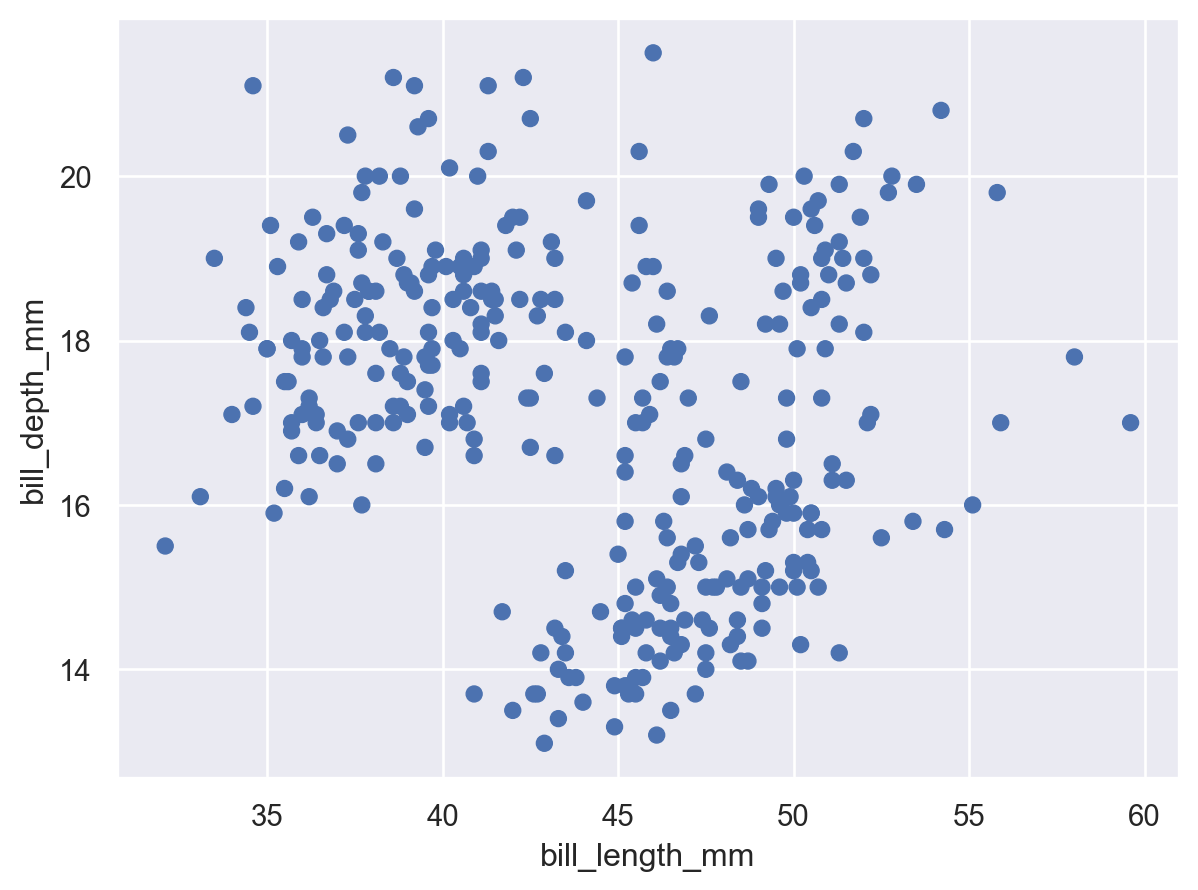

In [7]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot())
)

This code, which produces a scatter plot, should look reasonably familiar. Just as when using `seaborn.scatterplot`, we passed a tidy dataframe (`penguins`) and assigned two of its columns to the `x` and `y` coordinates of the plot. But instead of starting with the type of chart and then adding some data assignments, here we started with the data assignments and then added a graphical element.

### Setting properties

The `Dot` class is an example of a `Mark`: an object that graphically represents data values. Each mark will have a number of properties that can be set to change its appearance:

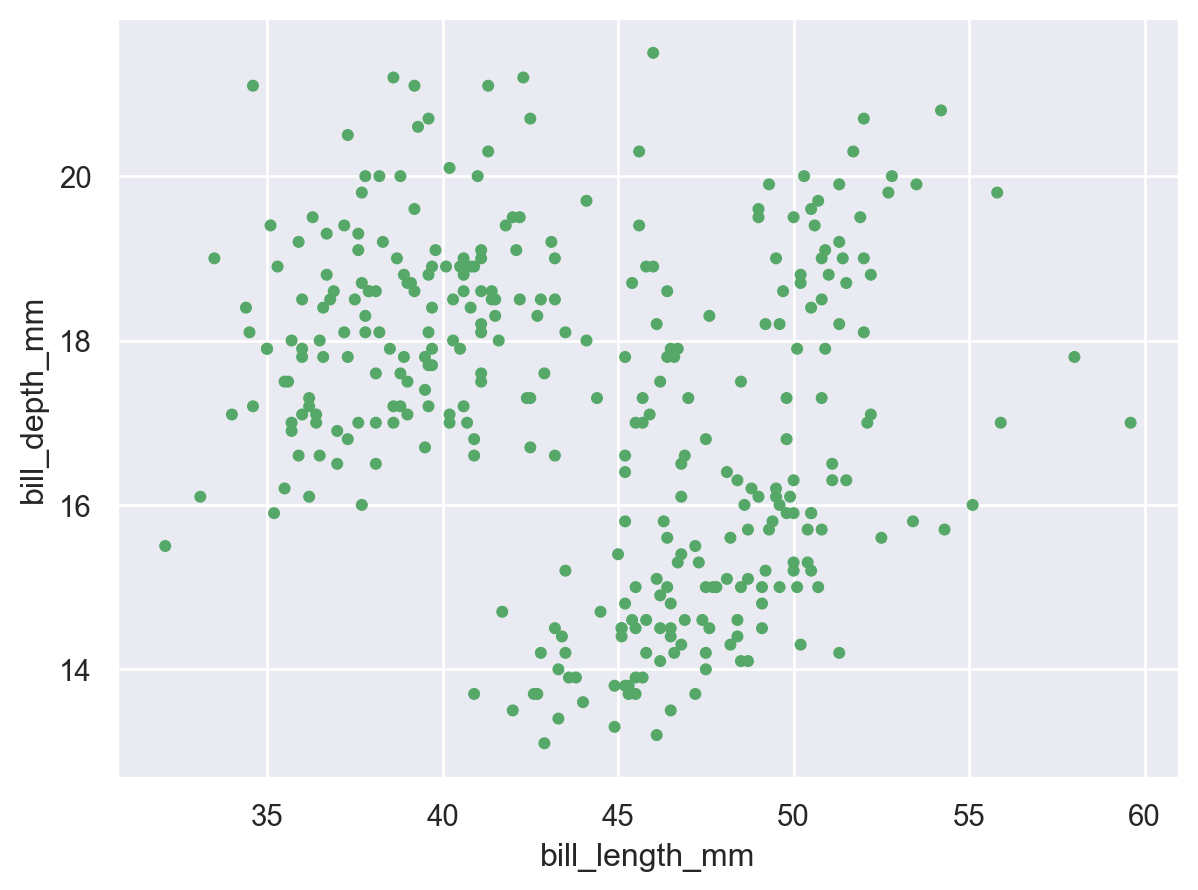

In [8]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot(color="g", pointsize=4))
)

Mapping properties


As with seaborn's functions, it is also possible to *map* data values to various graphical properties:

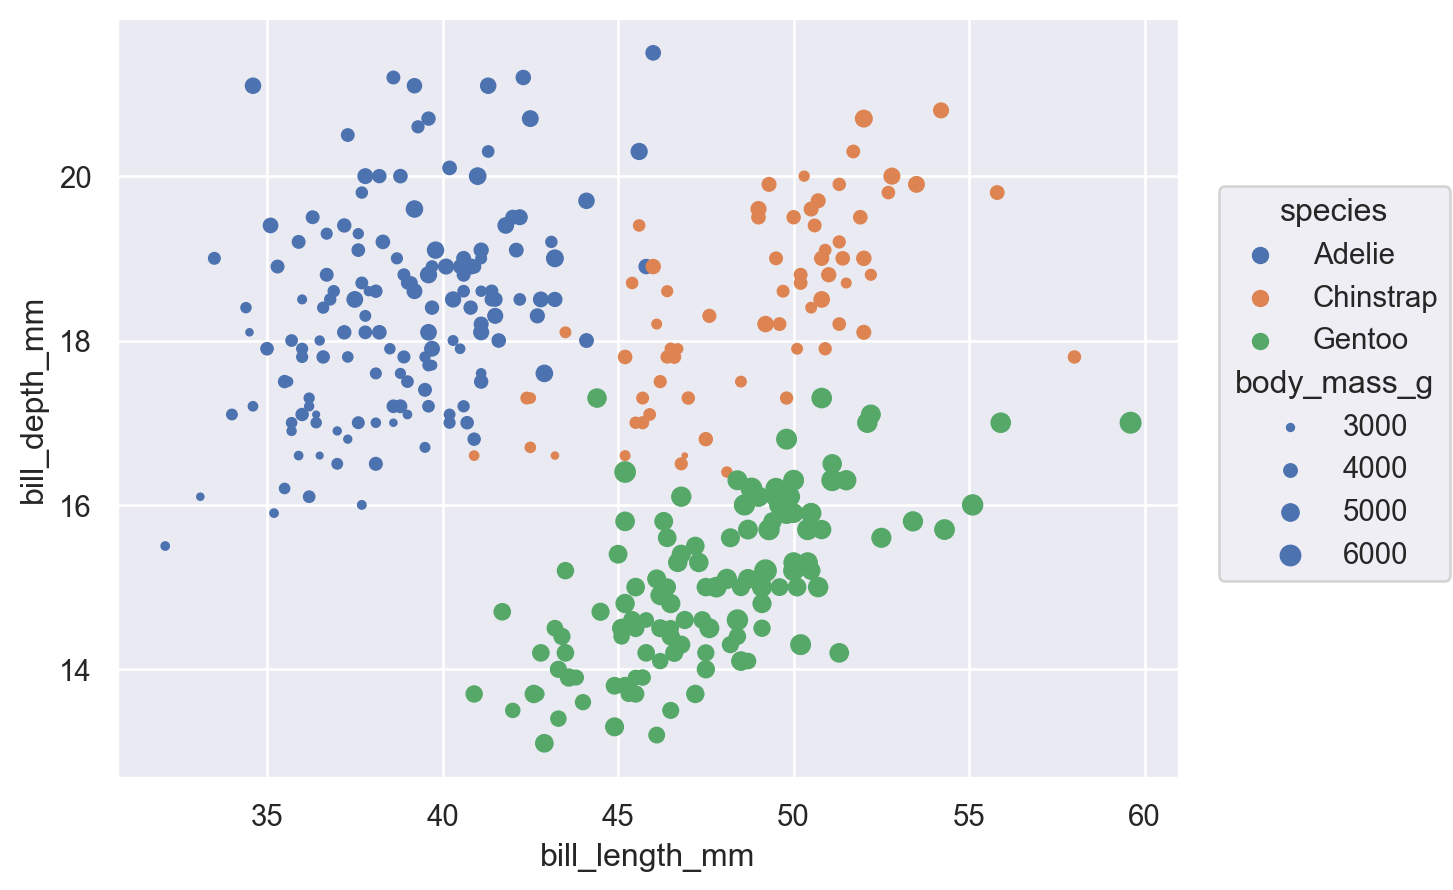

In [9]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

While this basic functionality is not novel, an important difference from the function API is that properties are mapped using the same parameter names that would set them directly (instead of having `hue` vs. `color`, etc.). What matters is *where* the property is defined: passing a value when you initialize `Dot` will set it directly, whereas assigning a variable when you set up the `Plot` will *map* the corresponding data.

Beyond this difference, the objects interface also allows a much wider range of mark properties to be mapped:

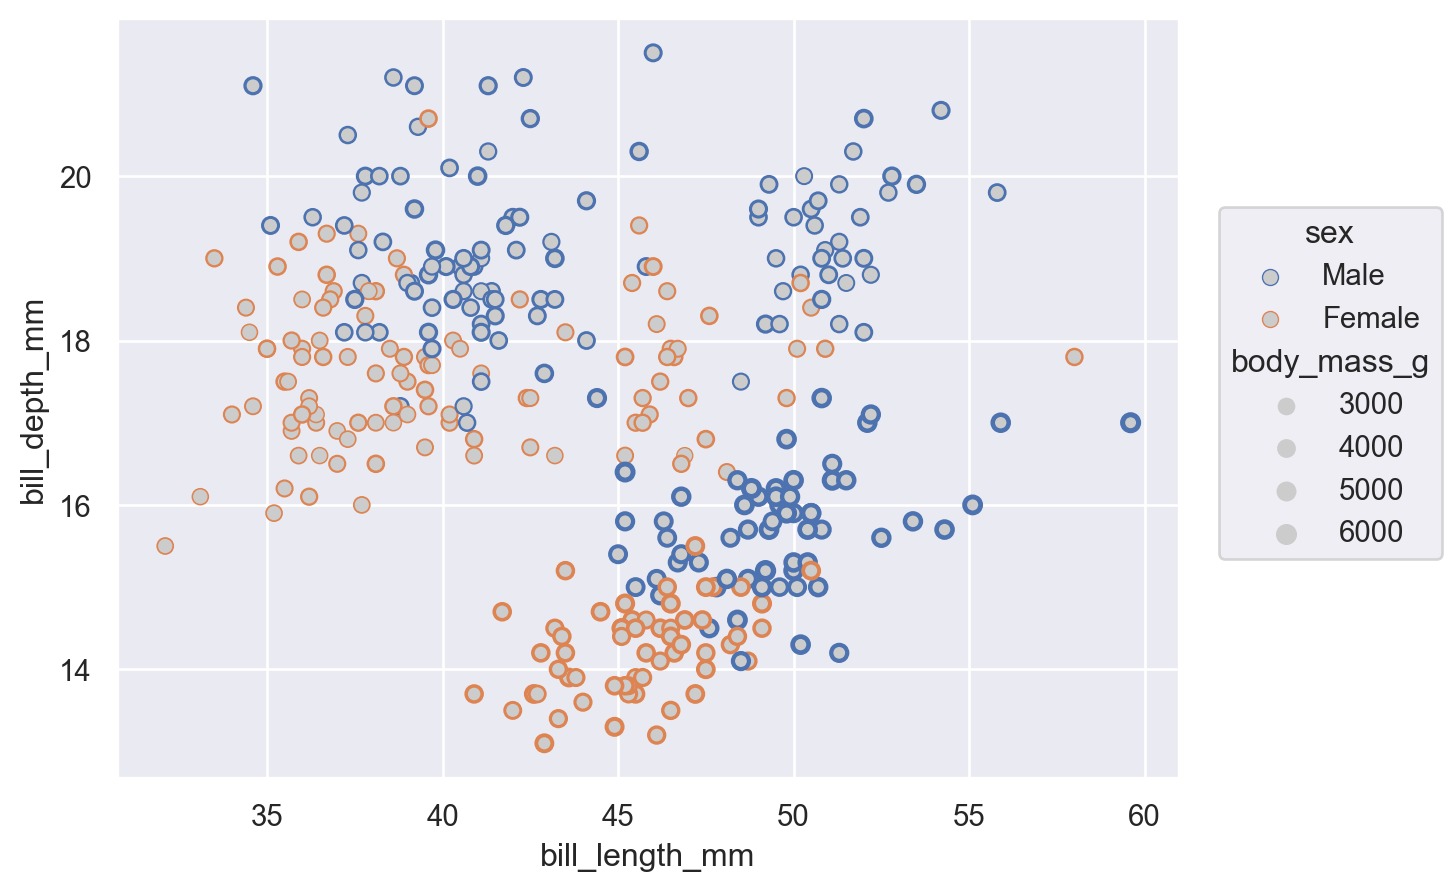

In [10]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        edgecolor="sex", edgewidth="body_mass_g",
    )
    .add(so.Dot(color=".8"))
)

### Defining groups

The `Dot` mark represents each data point independently, so the assignment of a variable to a property only has the effect of changing each dot's appearance. For marks that group or connect observations, such as `Line`, it also determines the number of distinct graphical elements:

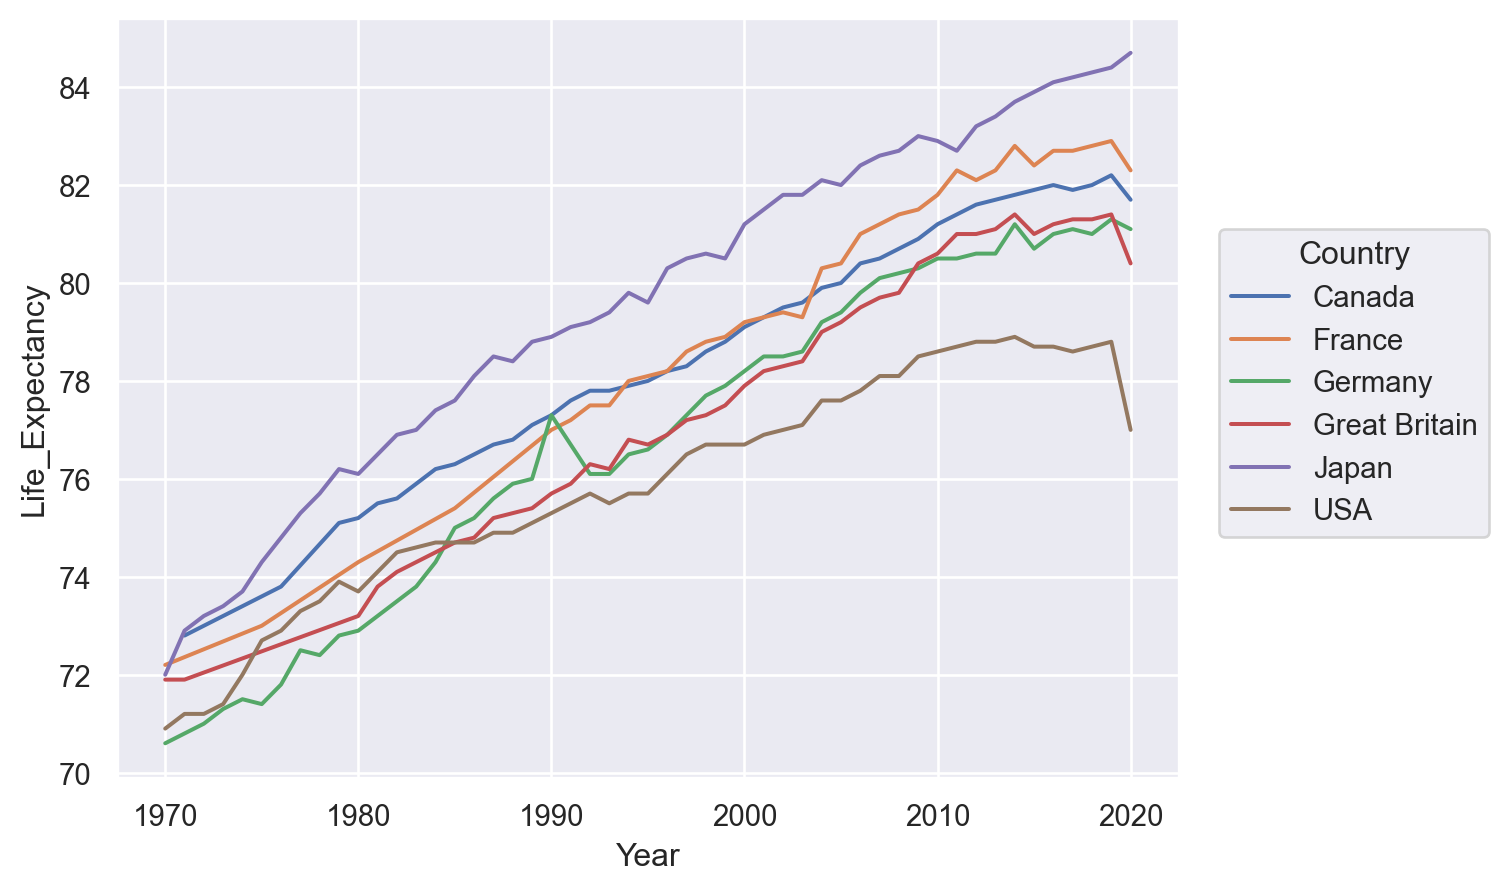

In [11]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", color="Country")
    .add(so.Line())
)

It is also possible to define a grouping without changing any visual properties, by using `group`:

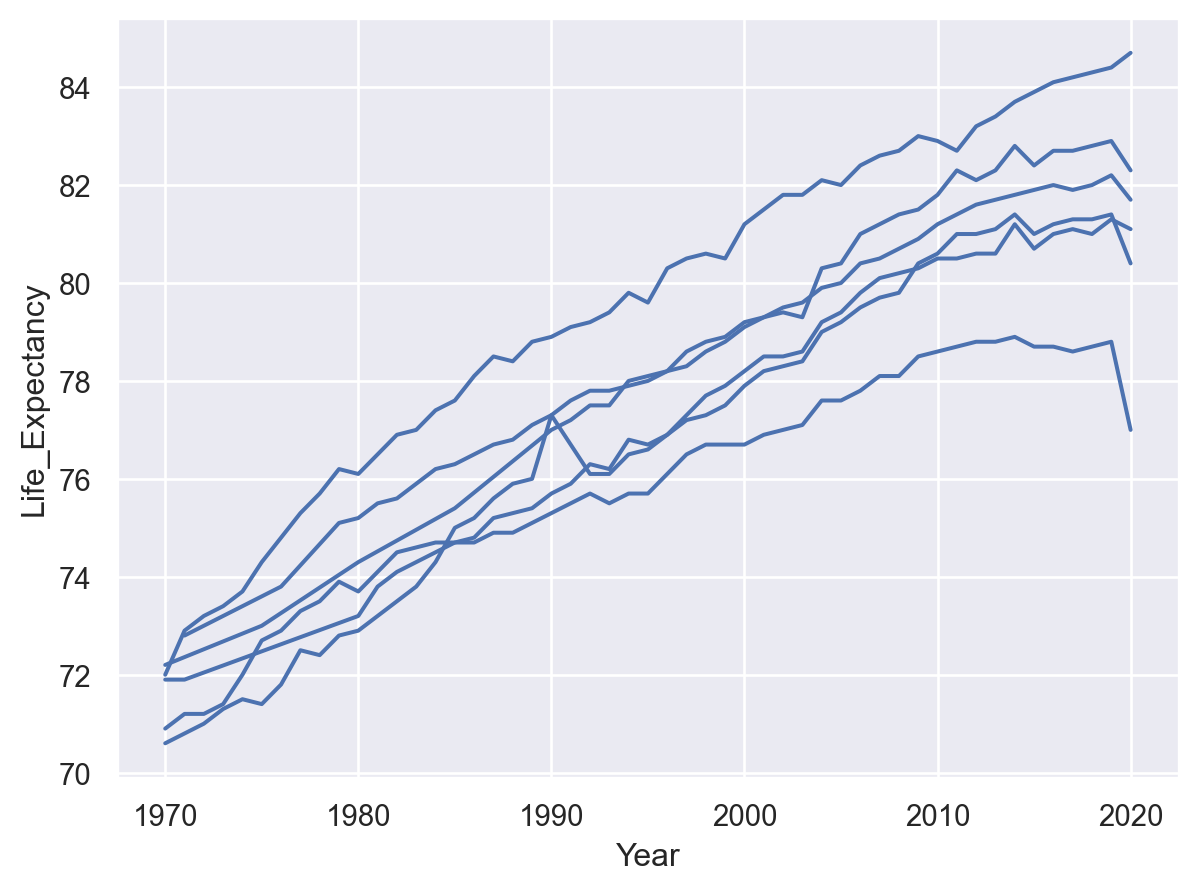

In [12]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", group="Country")
    .add(so.Line())
)

## Transforming data before plotting

### Statistical transformation

As with many seaborn functions, the objects interface supports statistical transformations. These are performed by `Stat` objects, such as `Agg`:

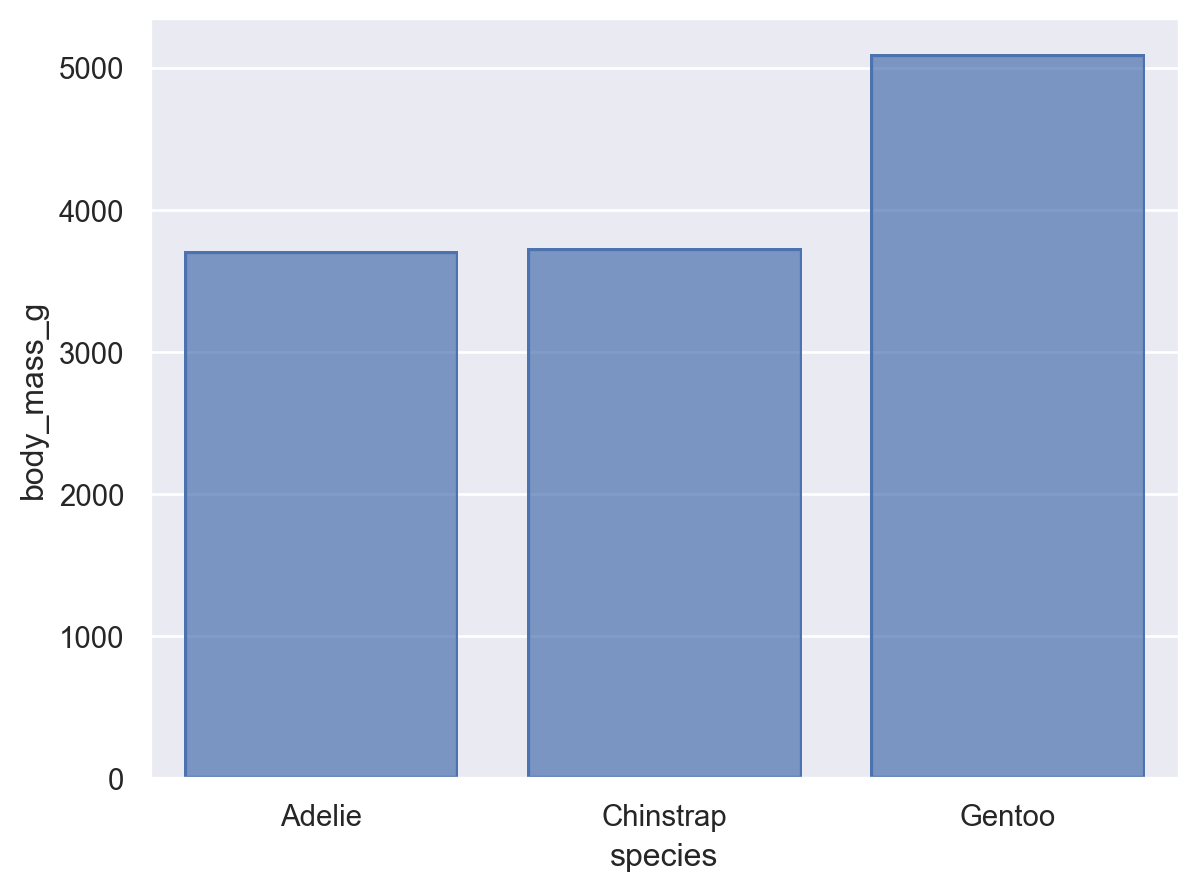

In [13]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Bar(), so.Agg())
)

In the function interface, statistical transformations are possible with some visual representations (e.g. `seaborn.barplot`) but not others (e.g. `seaborn.scatterplot`). The objects interface more cleanly separates representation and transformation, allowing you to compose `Mark` and `Stat` objects:

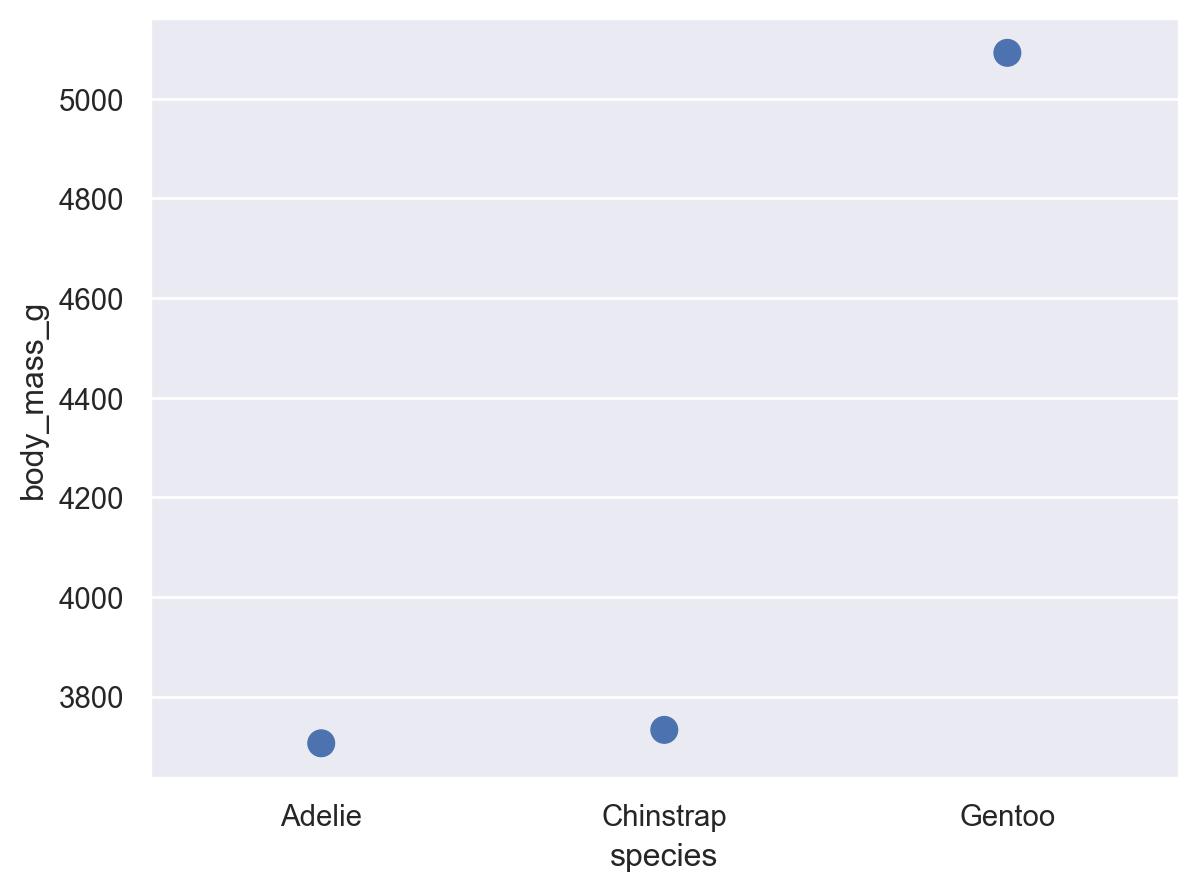

In [14]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Dot(pointsize=10), so.Agg())
)

When forming groups by mapping properties, the `Stat` transformation is applied to each group separately:

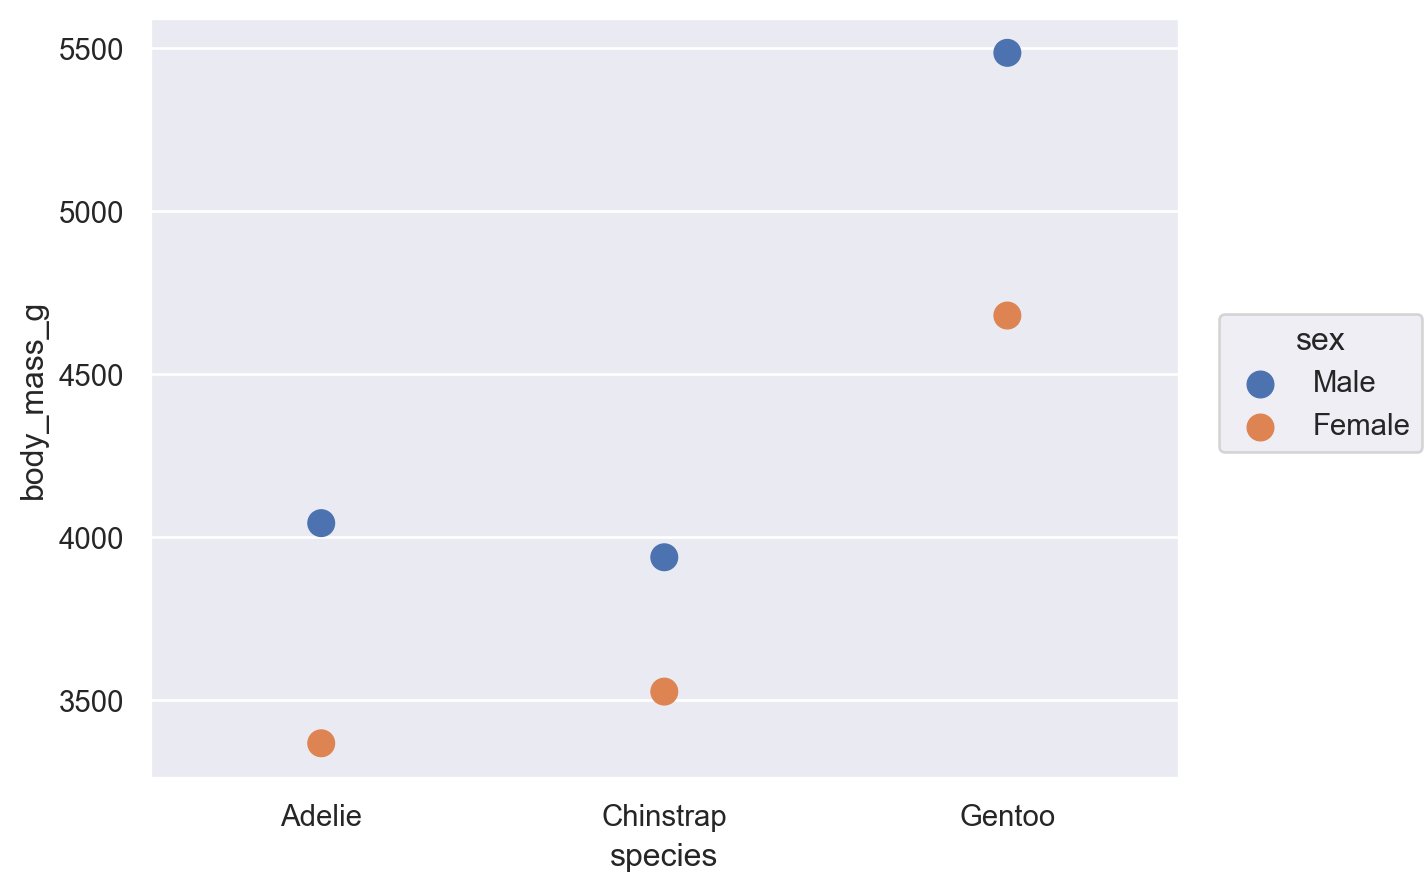

In [15]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(pointsize=10), so.Agg())
)

### Resolving overplotting

Some seaborn functions also have mechanisms that automatically resolve overplotting, as when `seaborn.barplot` "dodges" bars once `hue` is assigned. The objects interface has less complex default behavior. Bars representing multiple groups will overlap by default:

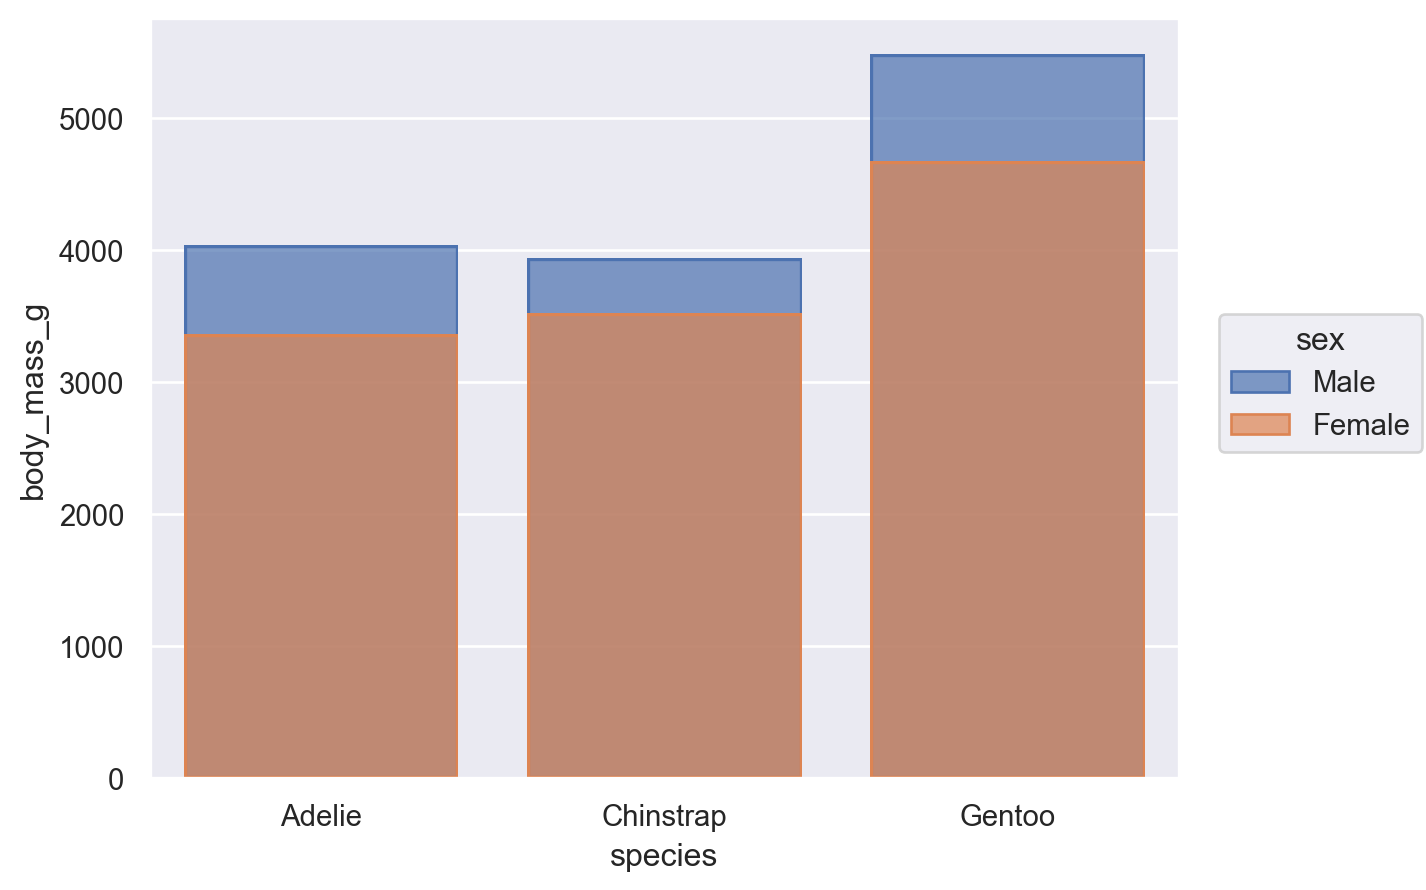

In [16]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())
)

Nevertheless, it is possible to compose the `Bar` mark with the `Agg` stat and a second transformation, implemented by `Dodge`:

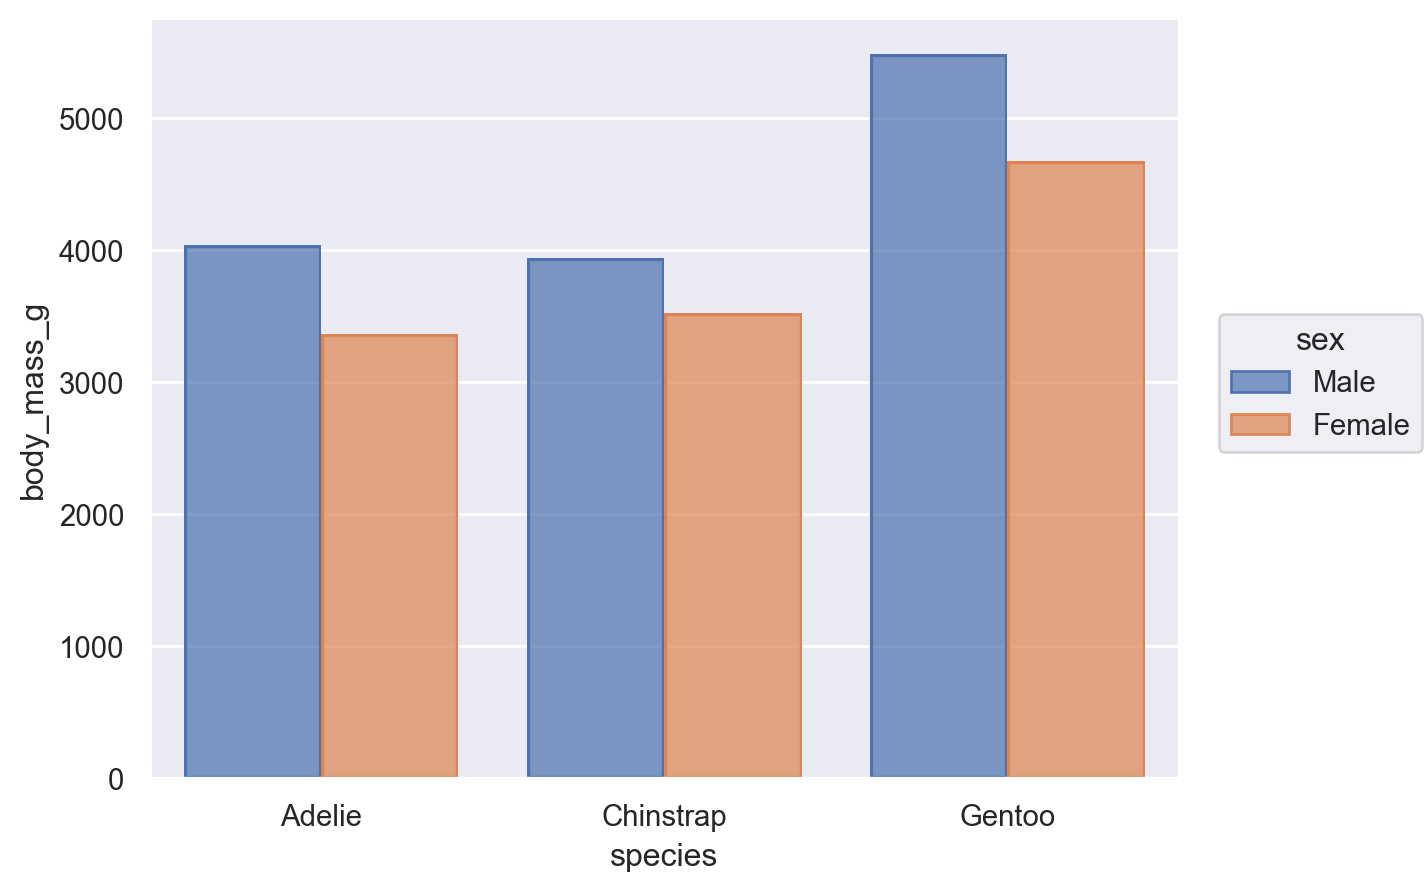

In [17]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

The `Dodge` class is an example of a `Move` transformation, which is like a `Stat` but only adjusts `x` and `y` coordinates. The `Move` classes can be applied with any mark, and it's not necessary to use a `Stat` first:

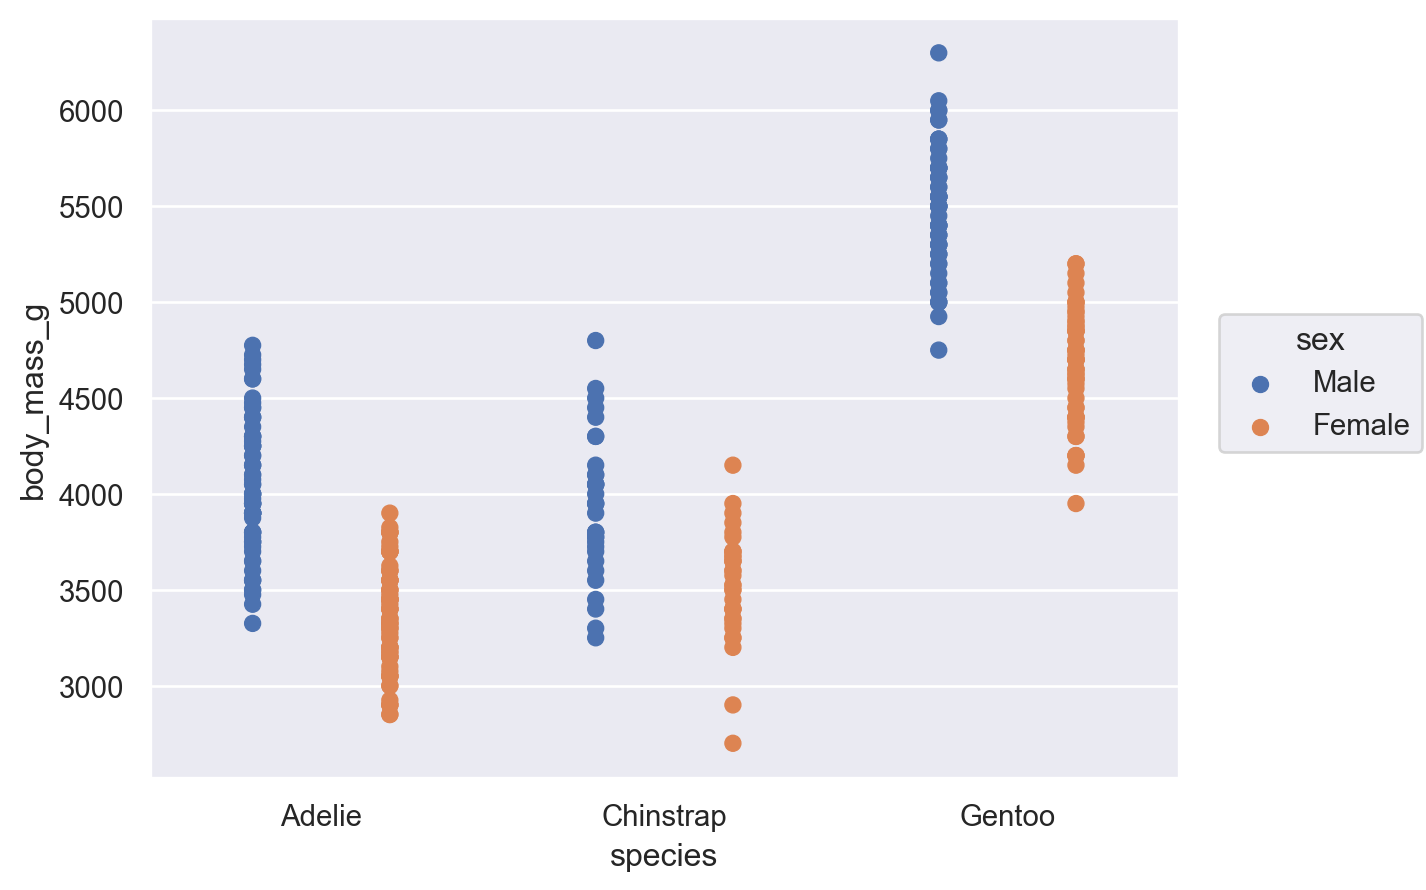

In [18]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge())
)

It's also possible to apply multiple `Move` operations in sequence:

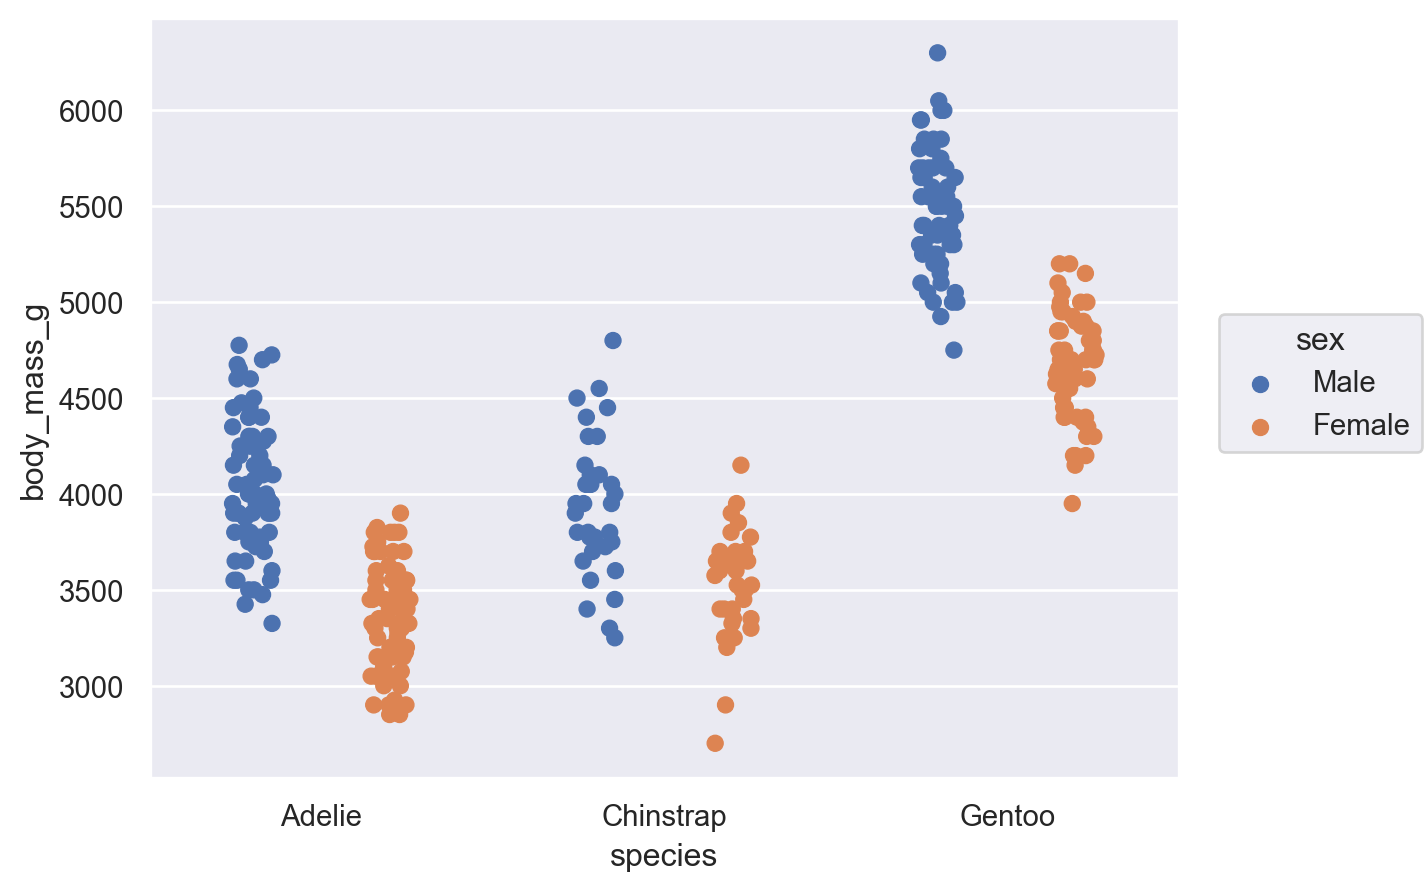

In [19]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3))
)

### Creating variables through transformation

The `Agg` stat requires both `x` and `y` to already be defined, but variables can also be *created* through statistical transformation. For example, the `Hist` stat requires only one of `x` *or* `y` to be defined, and it will create the other by counting observations:

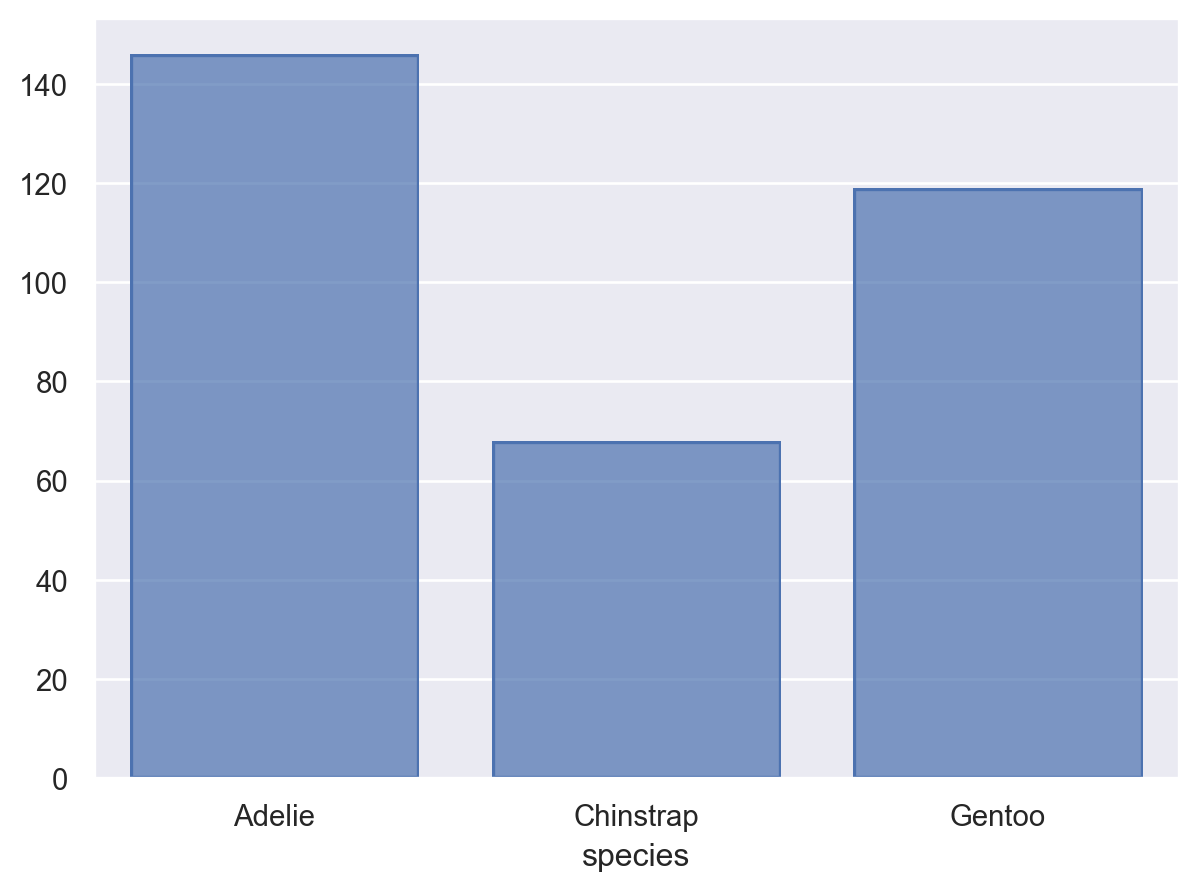

In [20]:
(
    so.Plot(penguins, x="species")
    .add(so.Bar(), so.Hist())
)

The `Hist` stat will also create new `x` values (by binning) when given numeric data:

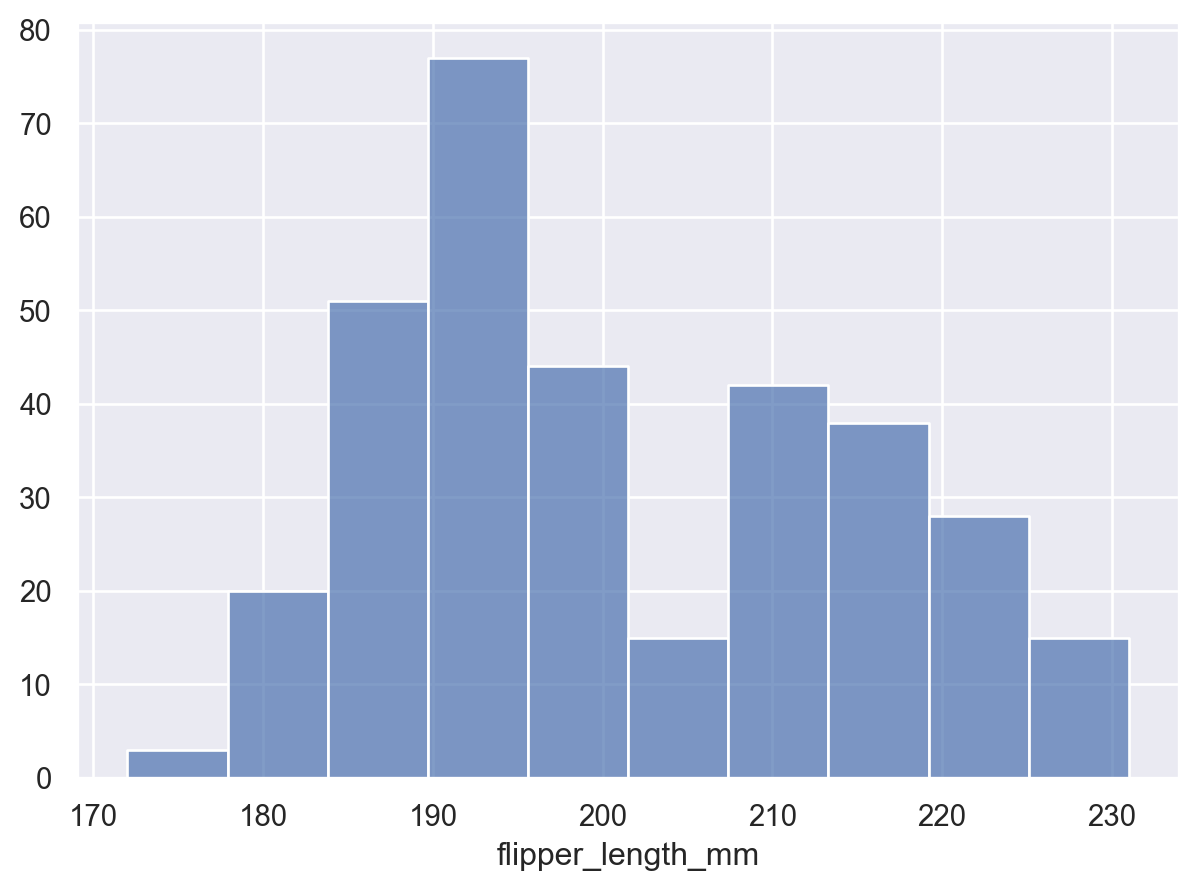

In [21]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .add(so.Bars(), so.Hist())
)

Notice how we used `Bars`, rather than `Bar` for the plot with the continuous `x` axis. These two marks are related, but `Bars` has different defaults and works better for continuous histograms. It also produces a different, more efficient matplotlib artist. You will find the pattern of singular/plural marks elsewhere. The plural version is typically optimized for cases with larger numbers of marks.

Some transforms accept both `x` and `y`, but add *interval* data for each coordinate. This is particularly relevant for plotting error bars after aggregating:

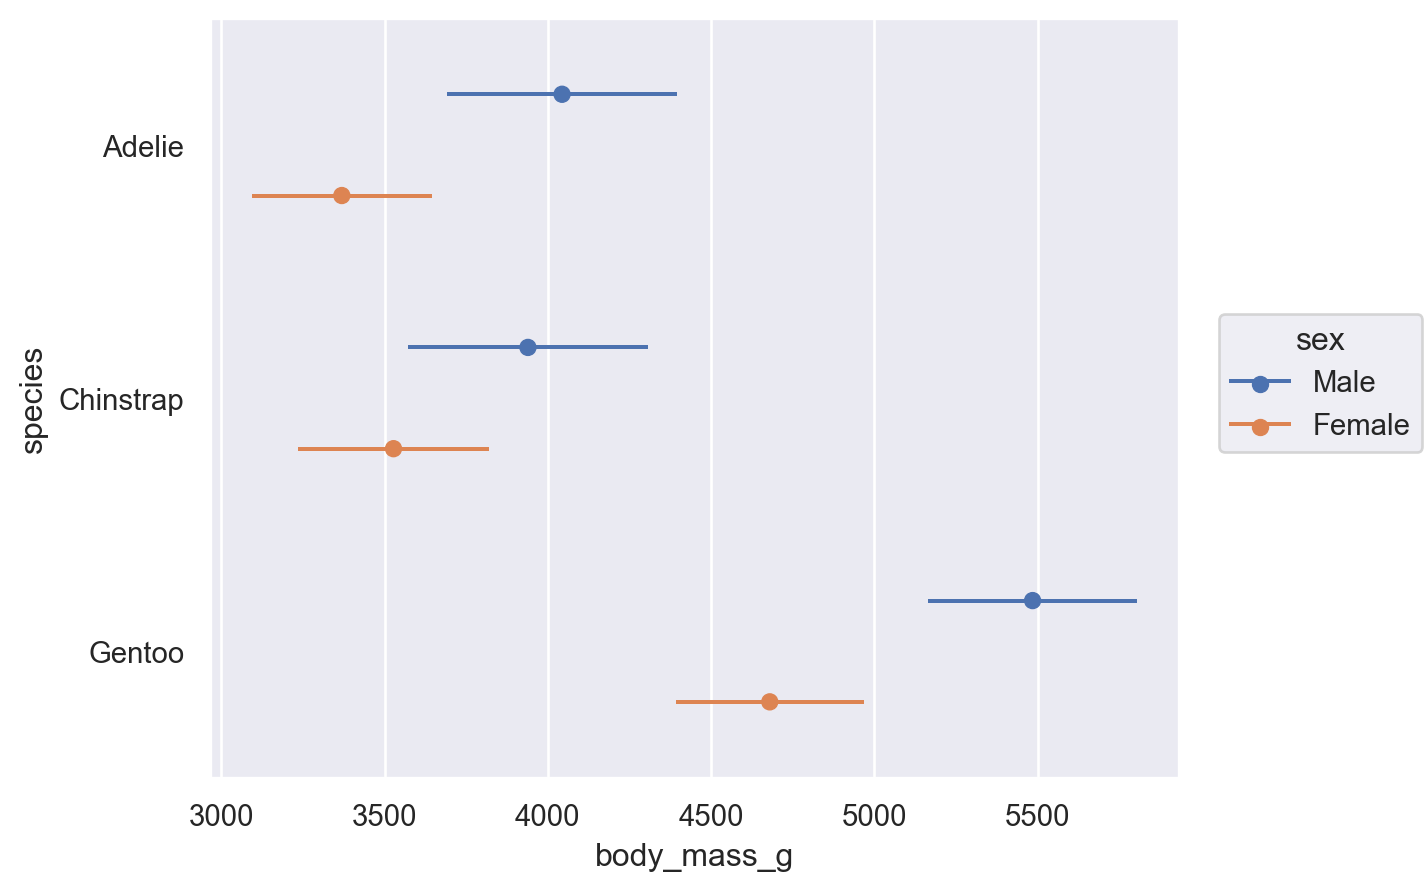

In [22]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Range(), so.Est(errorbar="sd"), so.Dodge())
    .add(so.Dot(), so.Agg(), so.Dodge())
)

### Orienting marks and transforms

When aggregating, dodging, and drawing a bar, the `x` and `y` variables are treated differently. Each operation has the concept of an *orientation*. The `Plot` tries to determine the orientation automatically based on the data types of the variables. For instance, if we flip the assignment of `species` and `body_mass_g`, we'll get the same plot, but oriented horizontally:

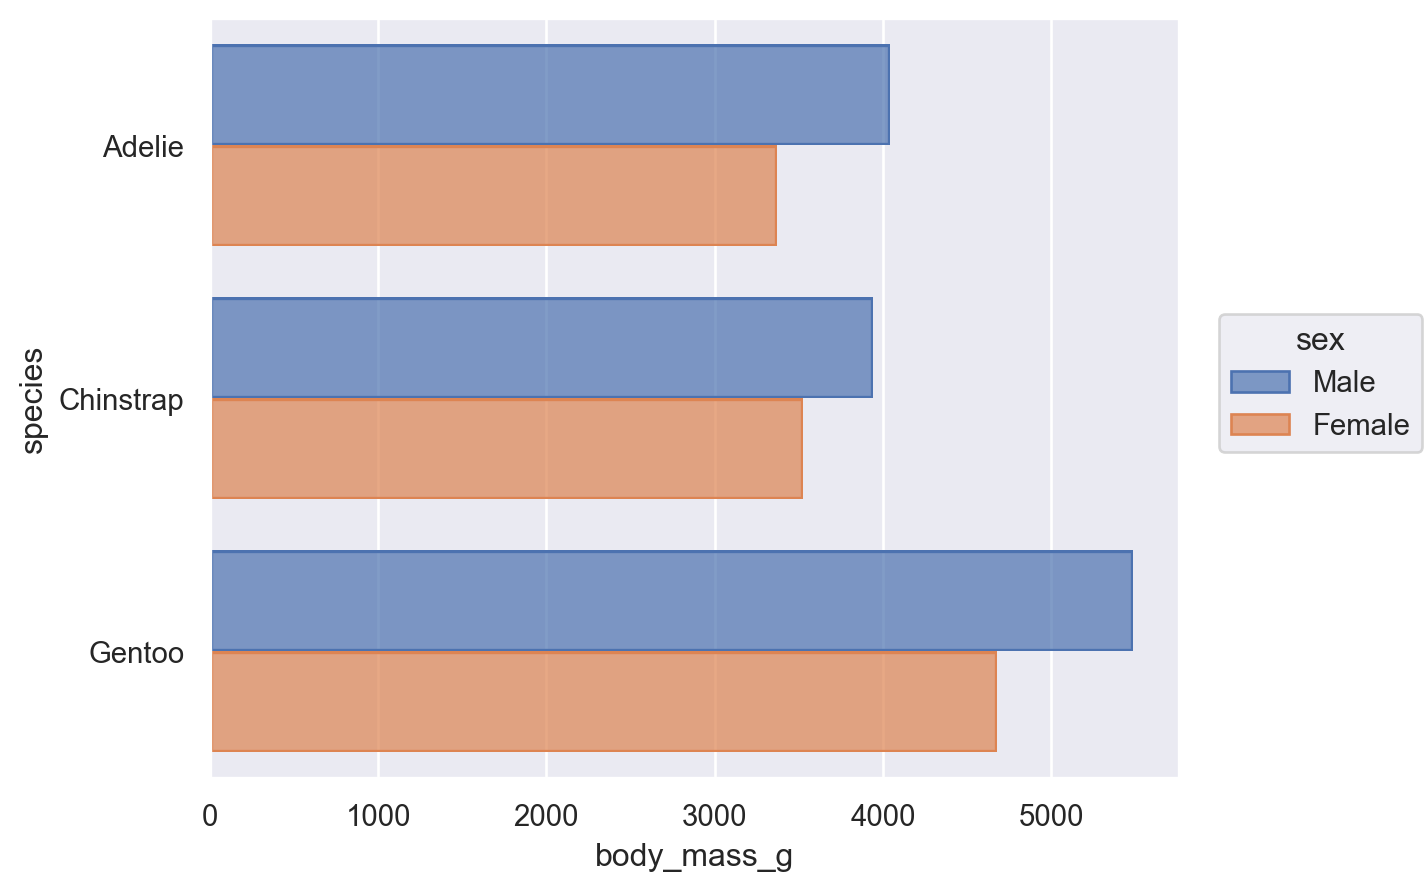

In [23]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

Sometimes, the correct orientation is ambiguous, as when both the `x` and `y` variables are numeric. In these cases, you can be explicit by passing the `orient` parameter to `Plot.add`:

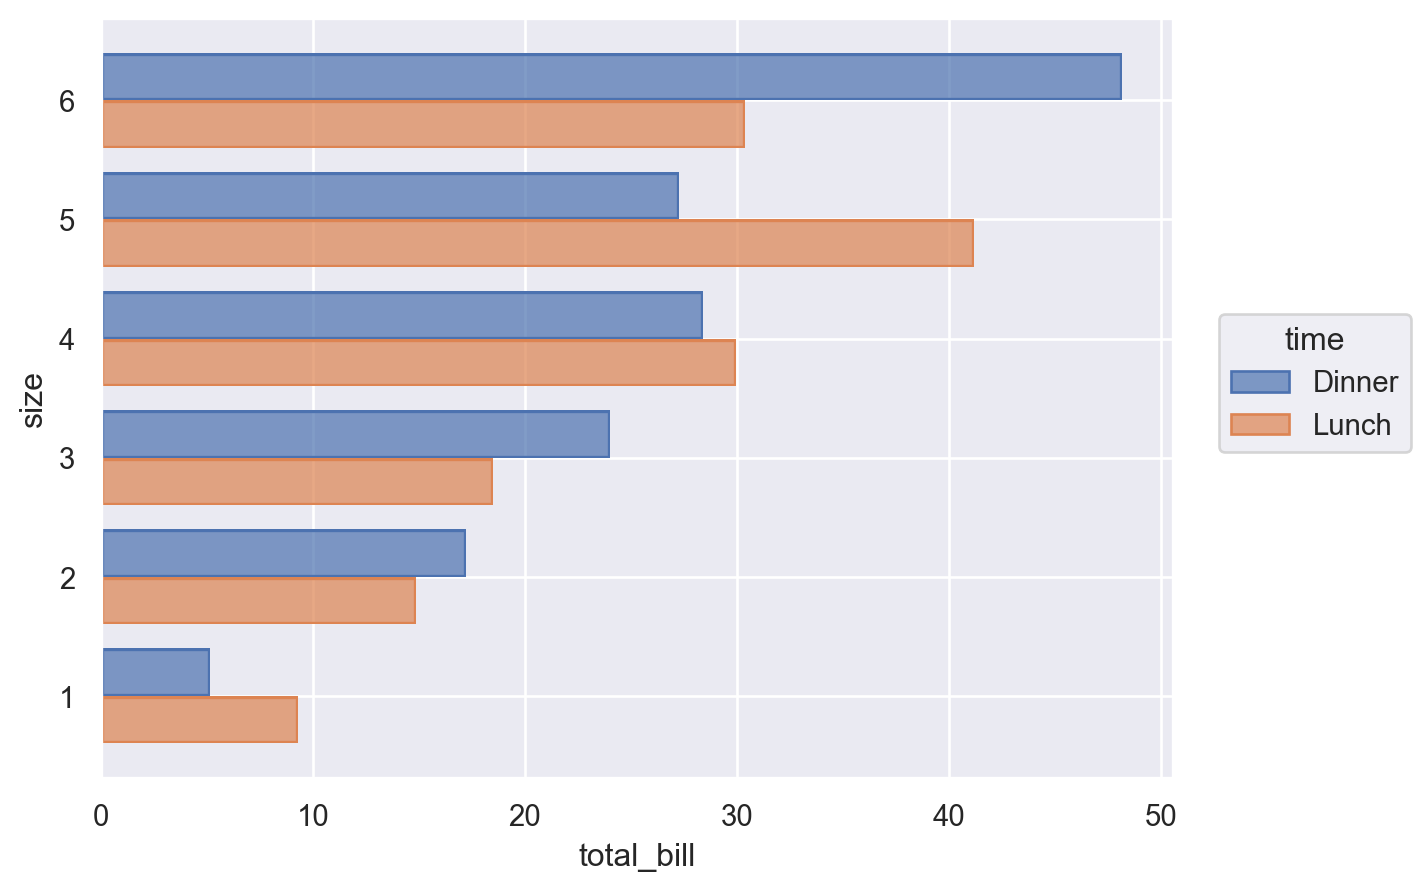

In [24]:
(
    so.Plot(tips, x="total_bill", y="size", color="time")
    .add(so.Bar(), so.Agg(), so.Dodge(), orient="y")
)

## Building and displaying the plot

Each example thus far has produced a single subplot with a single kind of mark on it. But `Plot` does not limit you to this.

### Adding multiple layers

More complex single-subplot graphics can be created by calling `Plot.add` repeatedly. Each time it is called, it defines a *layer* in the plot. For example, we may want to add a scatterplot (now using `Dots`) and then a regression fit:

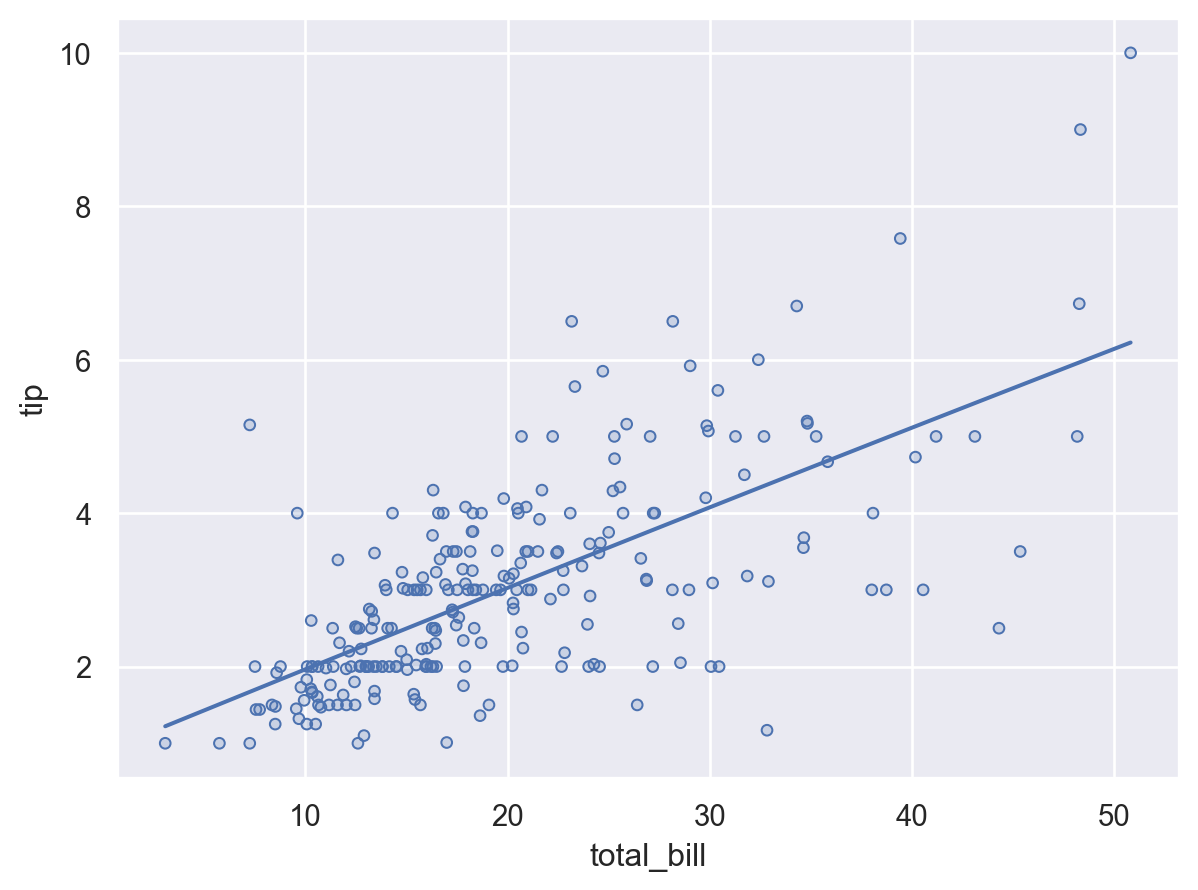

In [25]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

Variable mappings that are defined in the `Plot` constructor will be used for all layers:

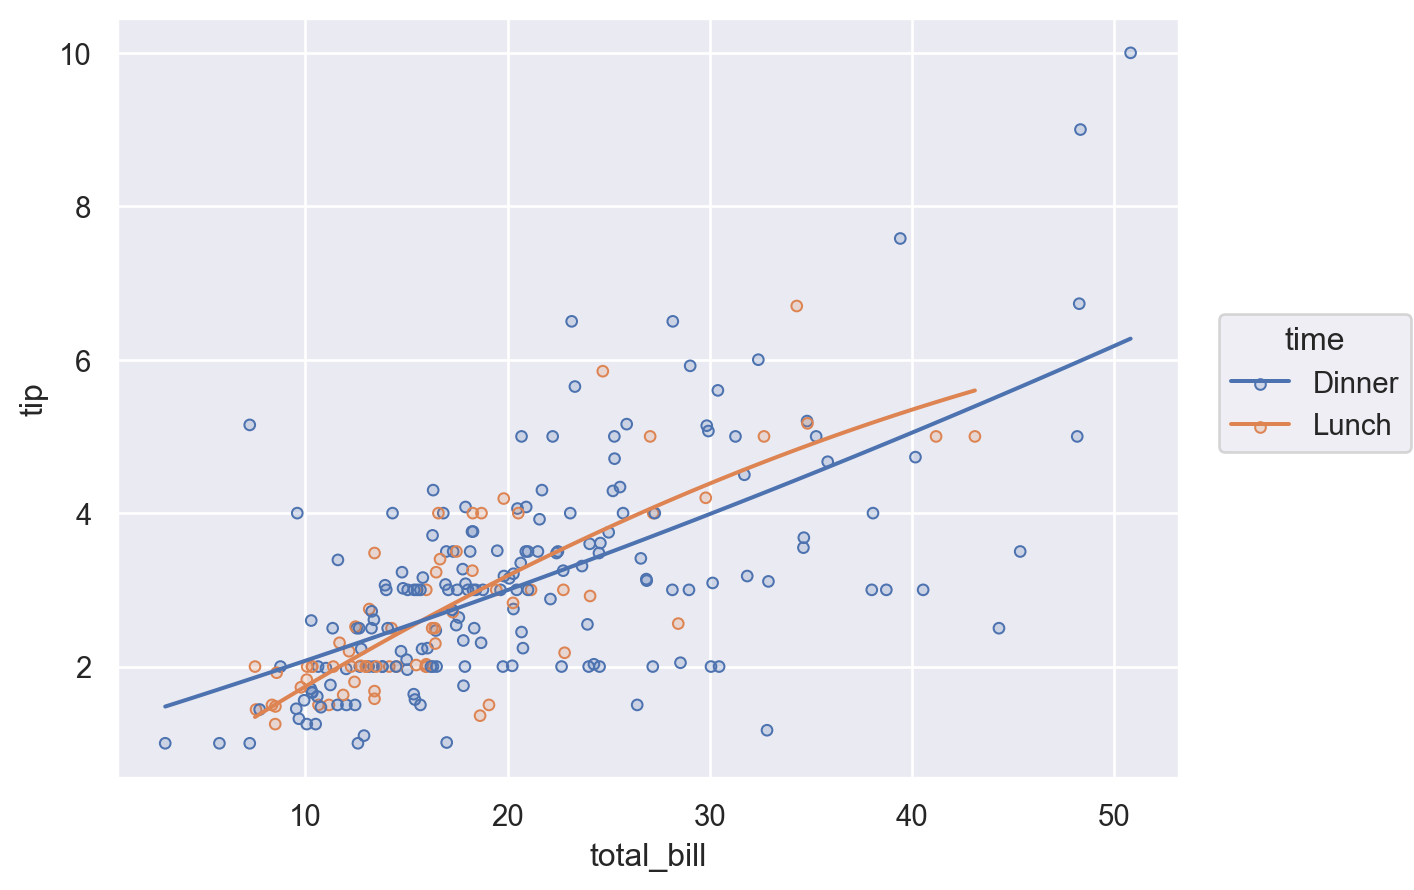

In [26]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

### Layer-specific mappings

You can also define a mapping such that it is used only in a specific layer. This is accomplished by defining the mapping within the call to `Plot.add` for the relevant layer:

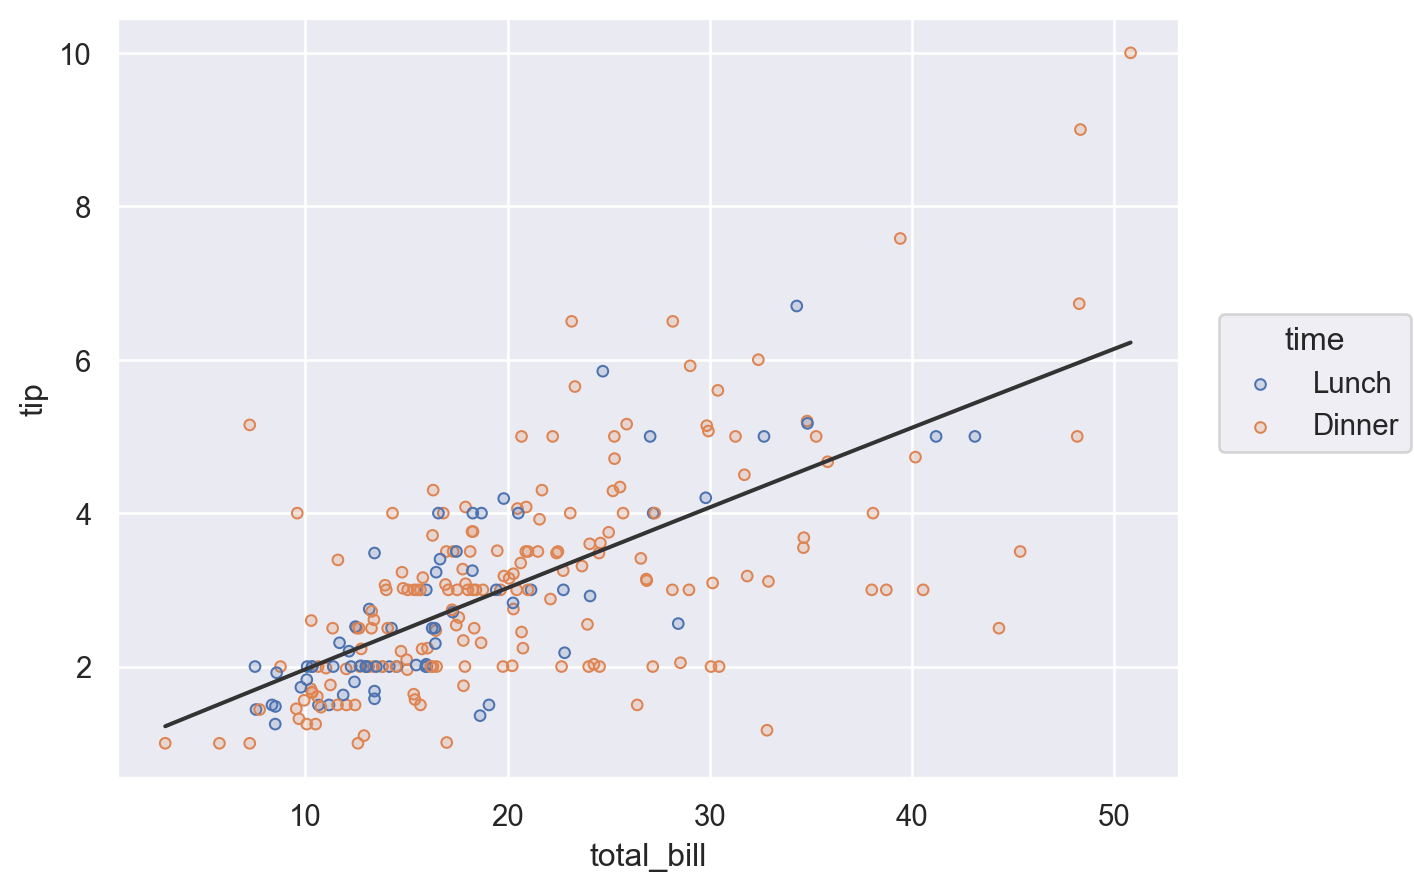

In [27]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots(), color="time")
    .add(so.Line(color=".2"), so.PolyFit())
)

Alternatively, define the layer for the entire plot, but *remove* it from a specific layer by setting the variable to `None`:

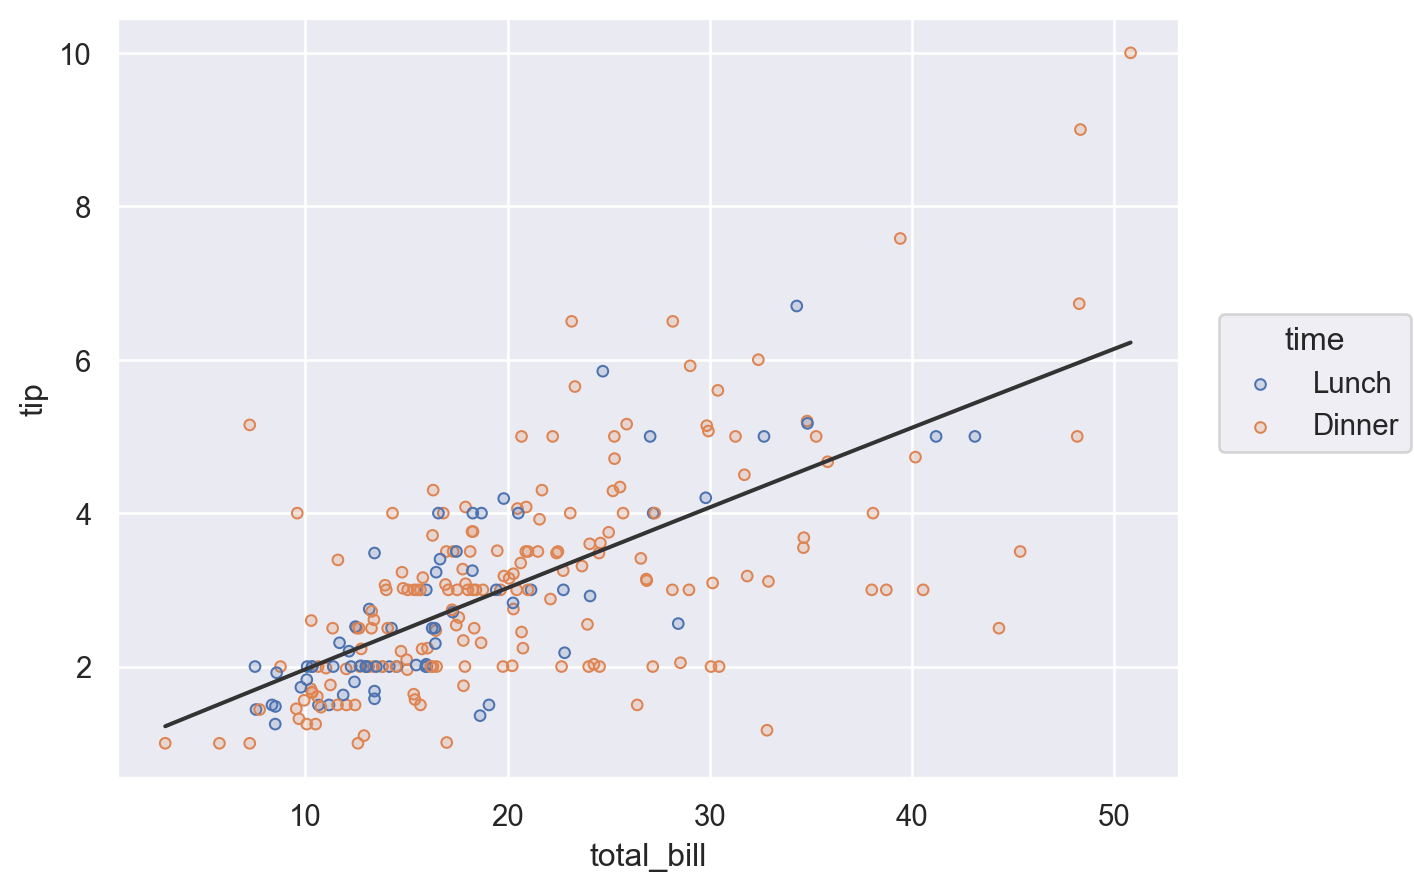

In [28]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(color=".2"), so.PolyFit(), color=None)
)

To recap, there are three ways to specify the value of a mark property: (1) by mapping a variable in all layers, (2) by mapping a variable in a specific layer, and (3) by setting the property directy:

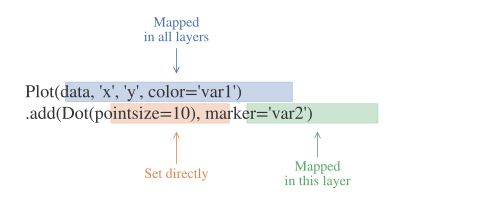

In [29]:
from io import StringIO
from IPython.display import SVG
C = sns.color_palette("deep")
f = mpl.figure.Figure(figsize=(7, 3))
ax = f.subplots()
fontsize = 18
ax.add_artist(mpl.patches.Rectangle((.13, .53), .45, .09, color=C[0], alpha=.3))
ax.add_artist(mpl.patches.Rectangle((.22, .43), .235, .09, color=C[1], alpha=.3))
ax.add_artist(mpl.patches.Rectangle((.49, .43), .26, .09, color=C[2], alpha=.3))
ax.text(.05, .55, "Plot(data, 'x', 'y', color='var1')", size=fontsize, color=".2")
ax.text(.05, .45, ".add(Dot(pointsize=10), marker='var2')", size=fontsize, color=".2")
annots = [
    ("Mapped\nin all layers", (.35, .65), (0, 45)),
    ("Set directly", (.35, .4), (0, -45)),
    ("Mapped\nin this layer", (.63, .4), (0, -45)),
]
for i, (text, xy, xytext) in enumerate(annots):
    ax.annotate(
        text, xy, xytext,
        textcoords="offset points", fontsize=14, ha="center", va="center",
        arrowprops=dict(arrowstyle="->", color=C[i]), color=C[i],
    )
ax.set_axis_off()
f.subplots_adjust(0, 0, 1, 1)
f.savefig(s:=StringIO(), format="svg")
SVG(s.getvalue())

### Faceting and pairing subplots

As with seaborn's figure-level functions (`seaborn.displot`, `seaborn.catplot`, etc.), the `Plot` interface can also produce figures with multiple "facets", or subplots containing subsets of data. This is accomplished with the `Plot.facet` method:

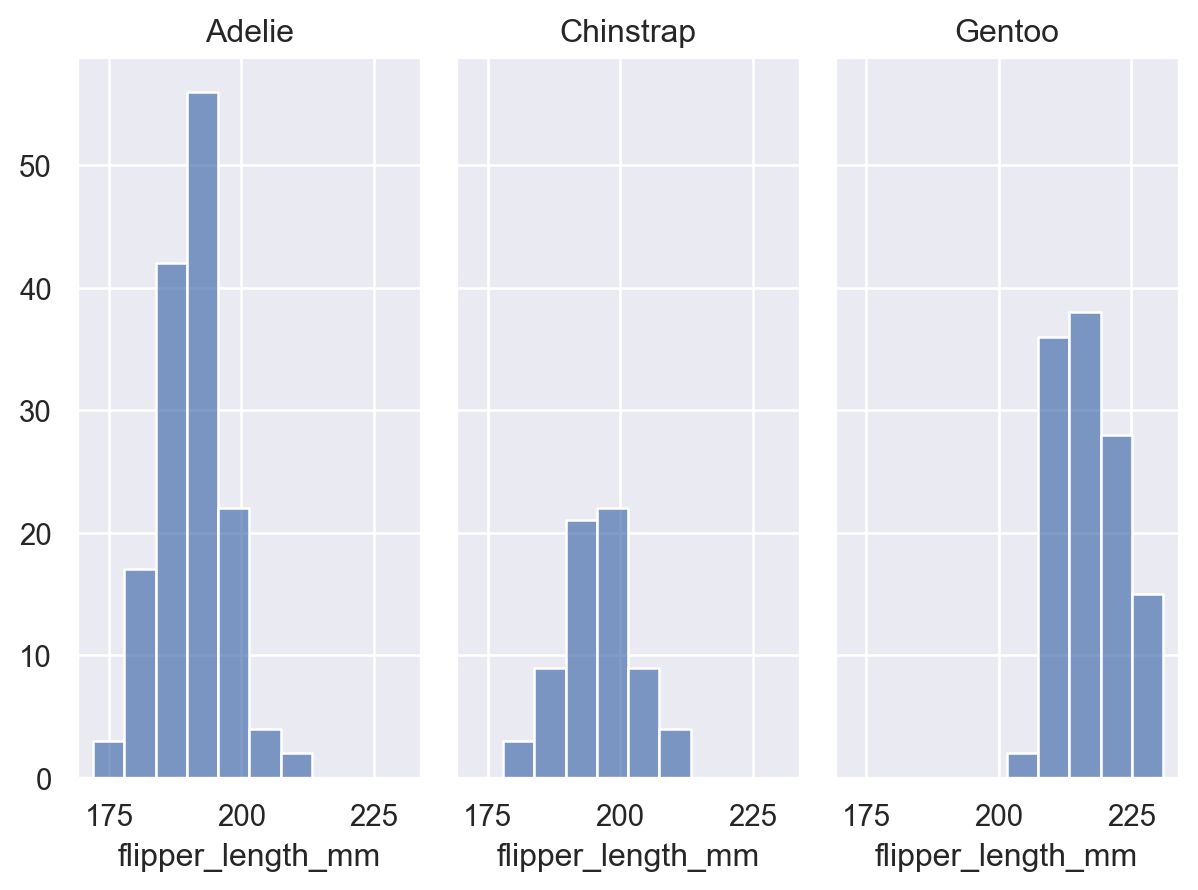

In [30]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet("species")
    .add(so.Bars(), so.Hist())
)

Call `Plot.facet` with the variables that should be used to define the columns and/or rows of the plot:

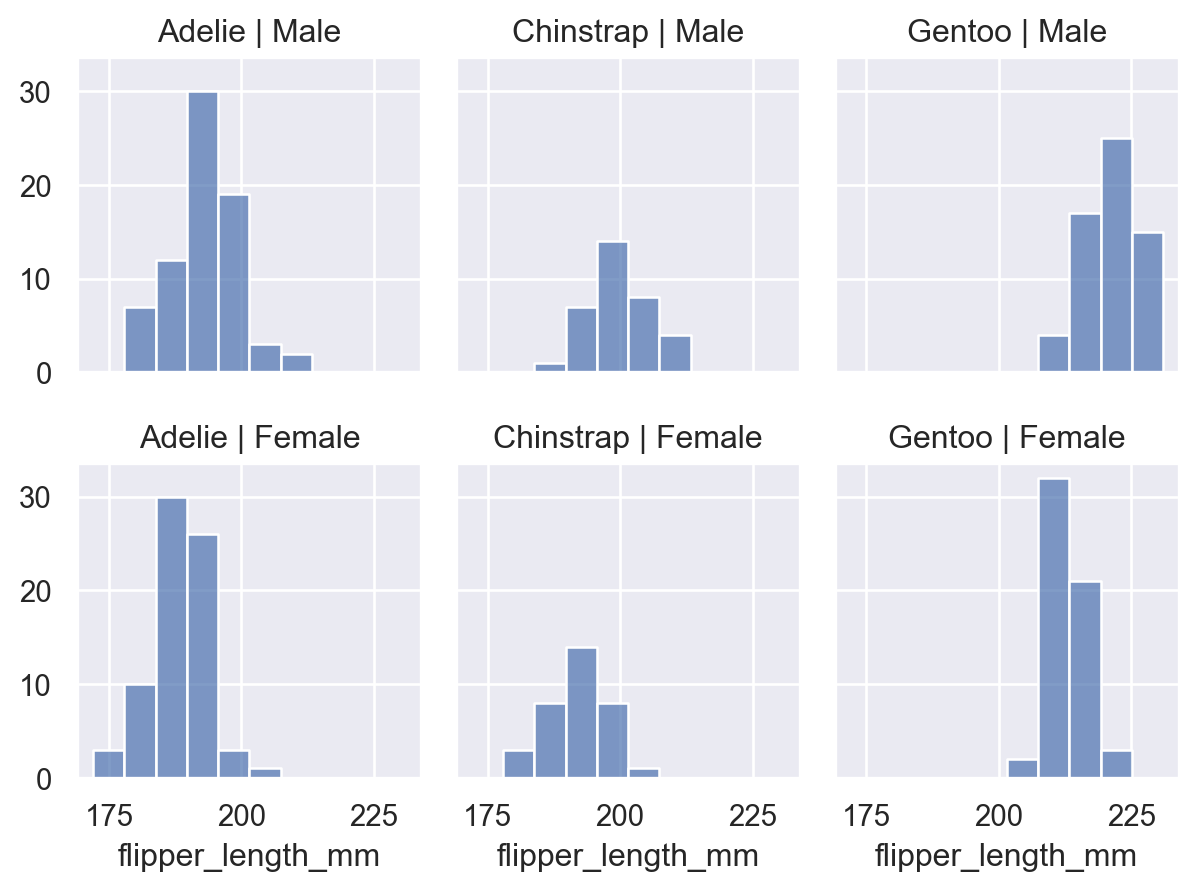

In [31]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

You can facet using a variable with a larger number of levels by "wrapping" across the other dimension:

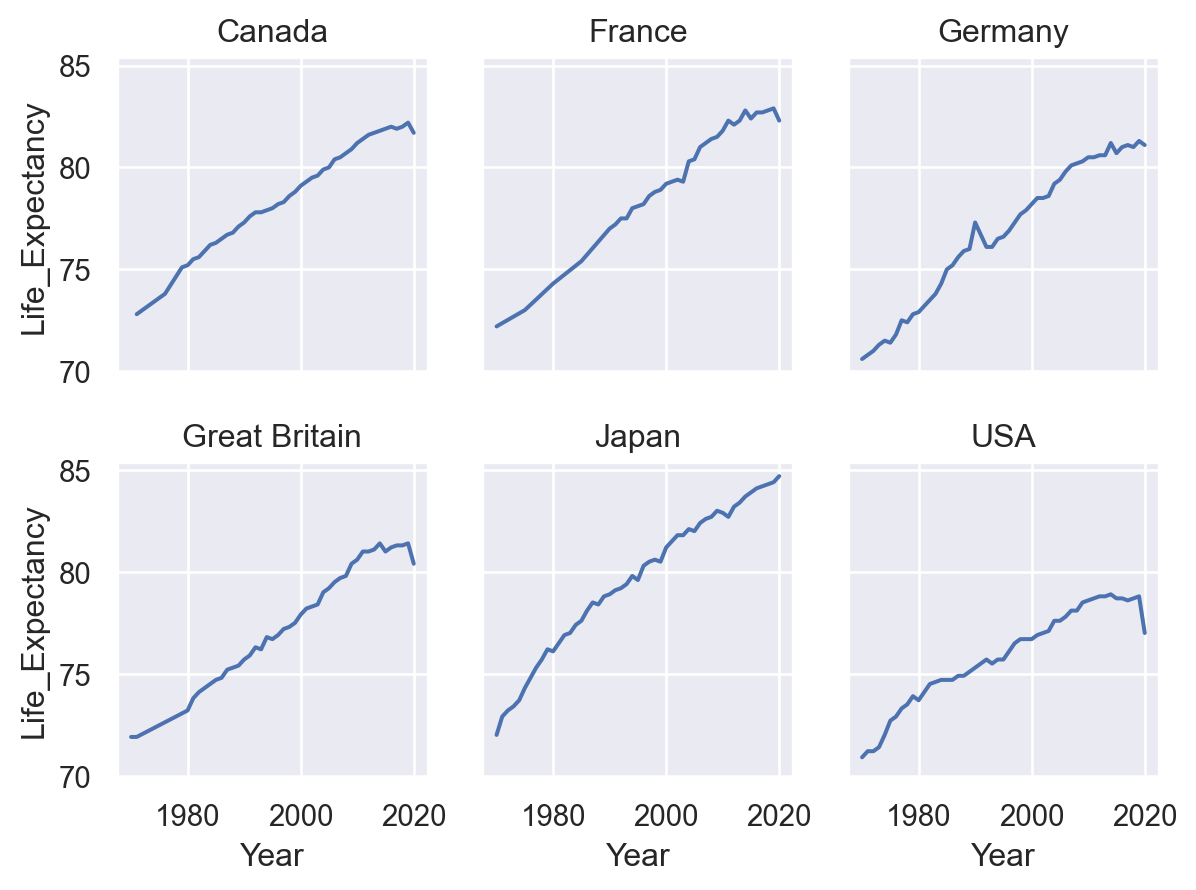

In [32]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .facet(col="Country", wrap=3)
    .add(so.Line())
)

All layers will be faceted unless you explicitly exclude them, which can be useful for providing additional context on each subplot:

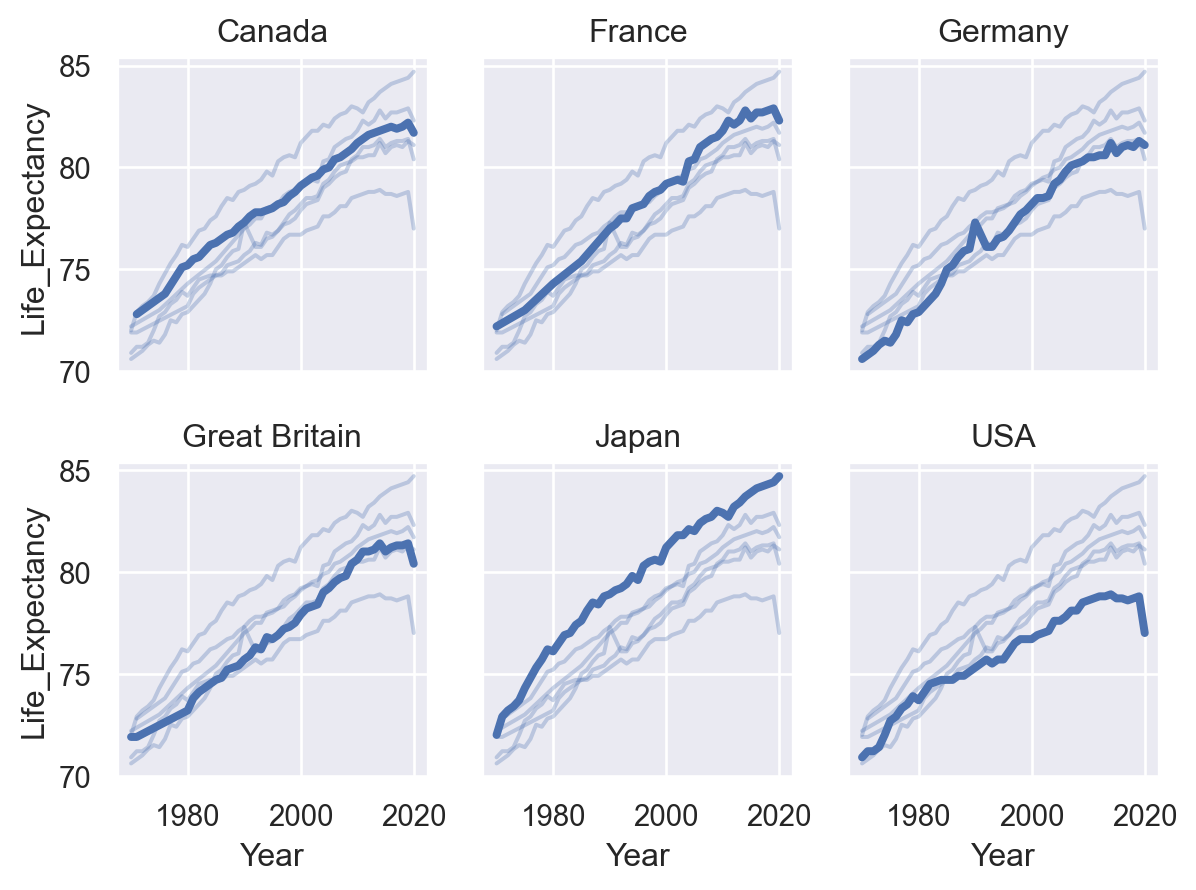

In [33]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .facet("Country", wrap=3)
    .add(so.Line(alpha=.3), group="Country", col=None)
    .add(so.Line(linewidth=3))
)

An alternate way to produce subplots is `Plot.pair`. Like `seaborn.PairGrid`, this draws all of the data on each subplot, using different variables for the x and/or y coordinates:

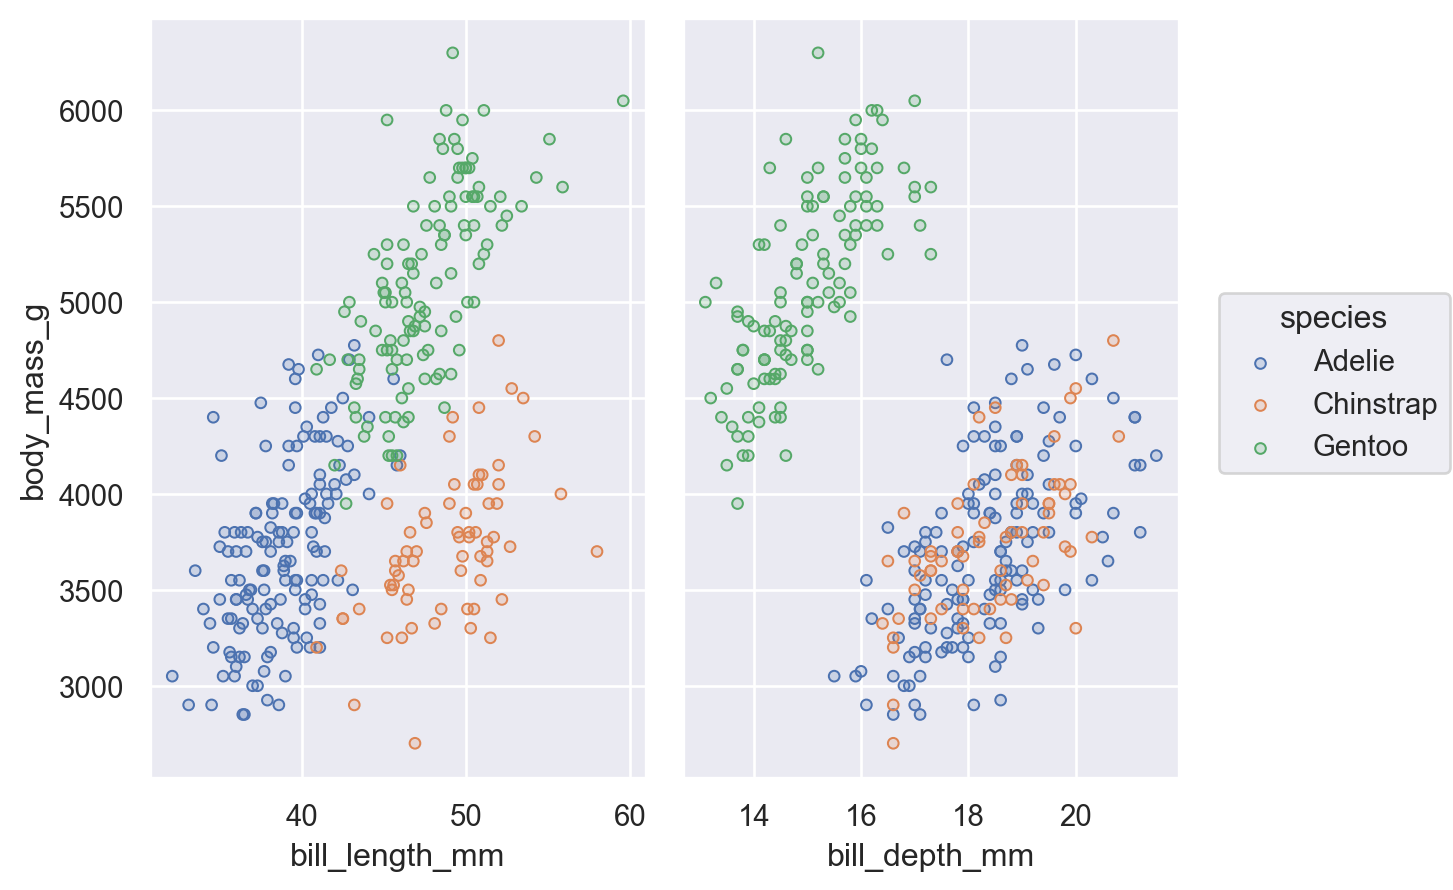

In [34]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .add(so.Dots())
)

You can combine faceting and pairing so long as the operations add subplots on opposite dimensions:

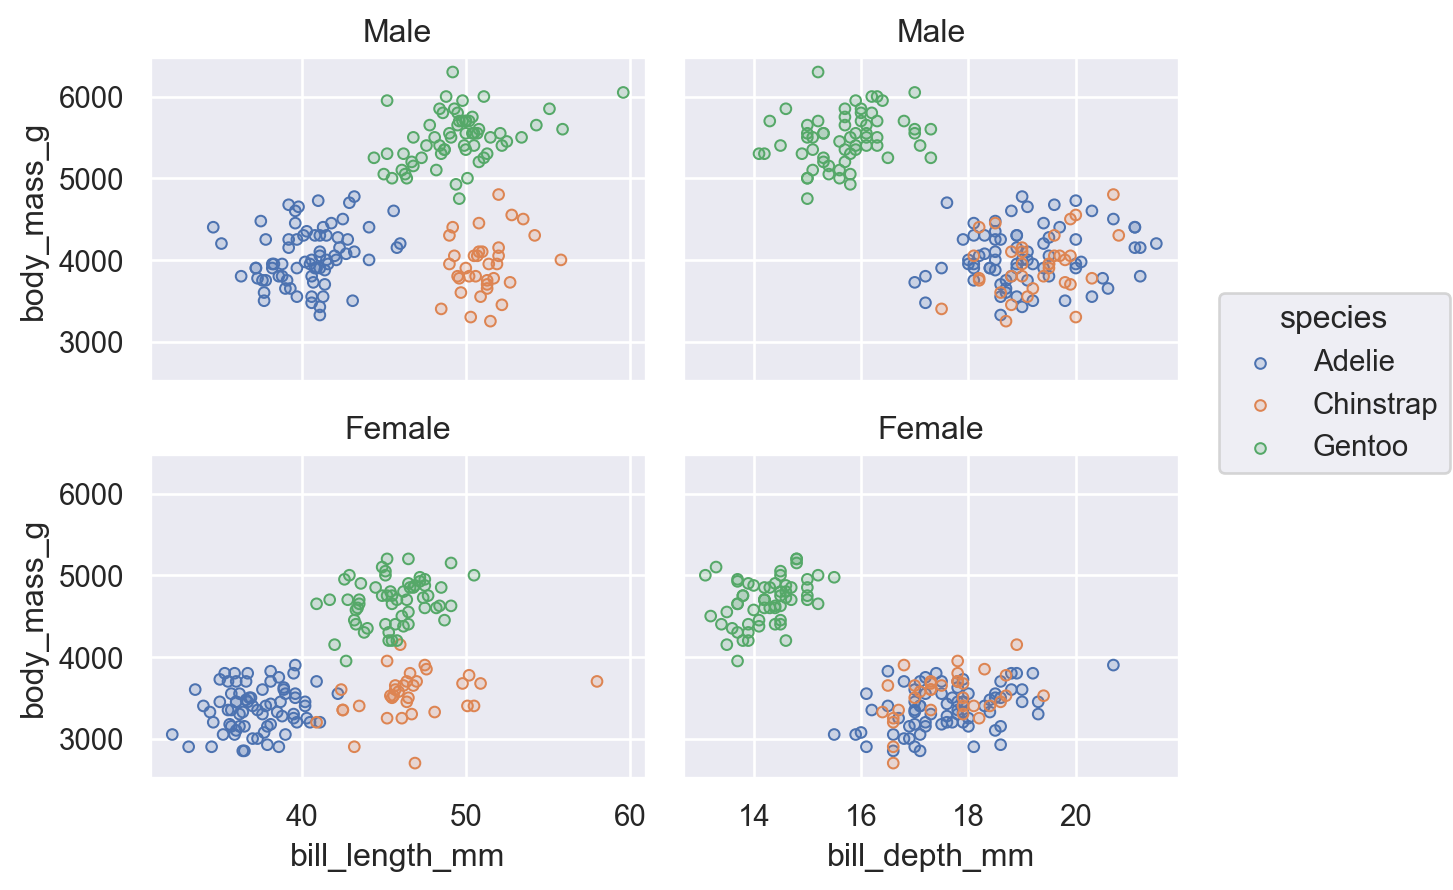

In [35]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="sex")
    .add(so.Dots())
)

### Integrating with matplotlib

There may be cases where you want multiple subplots to appear in a figure with a more complex structure than what `Plot.facet` or `Plot.pair` can provide. The current solution is to delegate figure setup to matplotlib and to supply the matplotlib object that `Plot` should use with the `Plot.on` method. This object can be either a `matplotlib.axes.Axes`, `matplotlib.figure.Figure`, or `matplotlib.figure.SubFigure`; the latter is most useful for constructing bespoke subplot layouts:

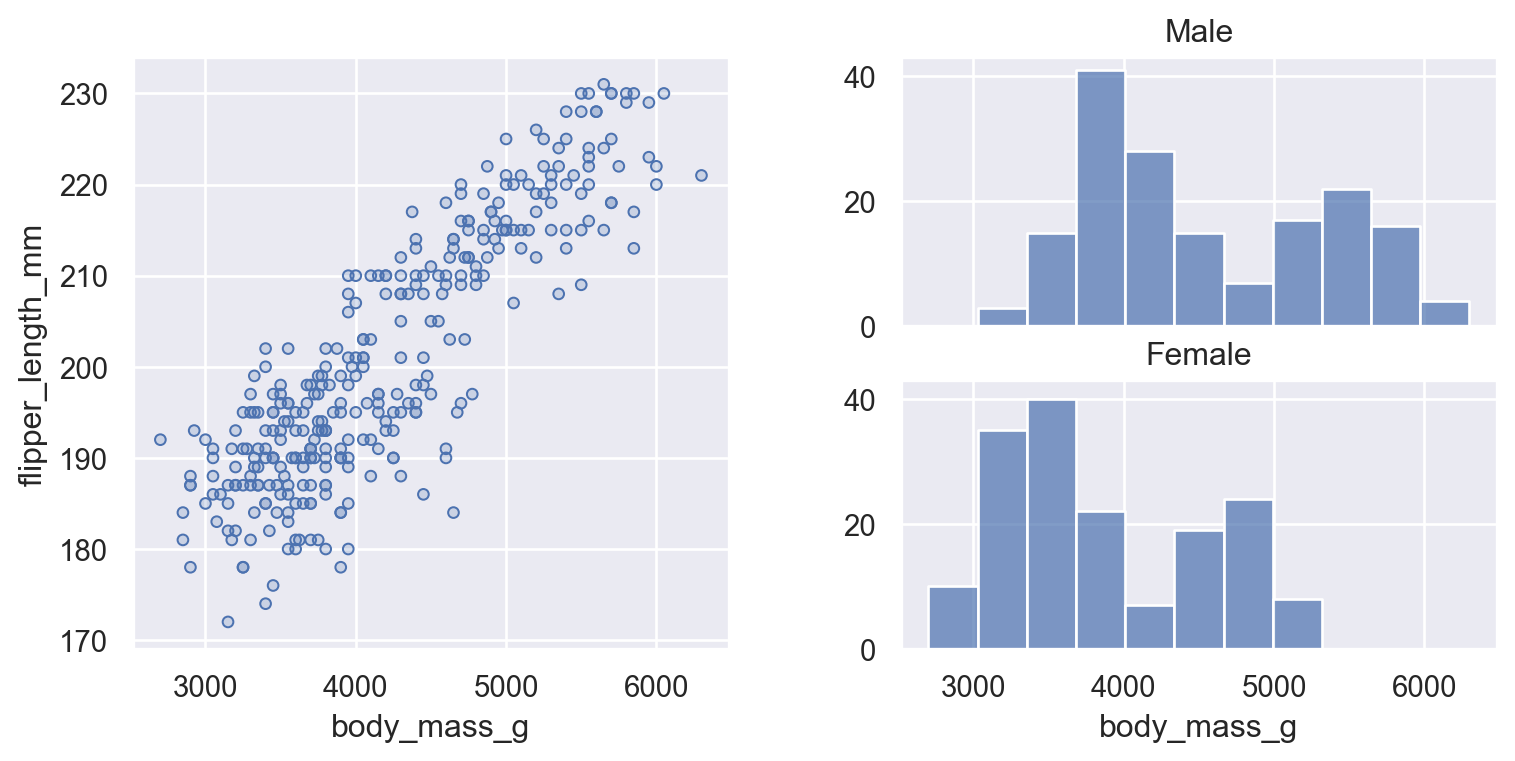

In [36]:
f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(penguins, x="body_mass_g")
    .facet(row="sex")
    .add(so.Bars(), so.Hist())
    .on(sf2)
    .plot()
)

### Building and displaying the plot

An important thing to know is that `Plot` methods clone the object they are called on and return that clone instead of updating the object in place. This means that you can define a common plot spec and then produce several variations on it.

So, take this basic specification:

In [37]:
p = so.Plot(healthexp, "Year", "Spending_USD", color="Country")

We could use it to draw a line plot:

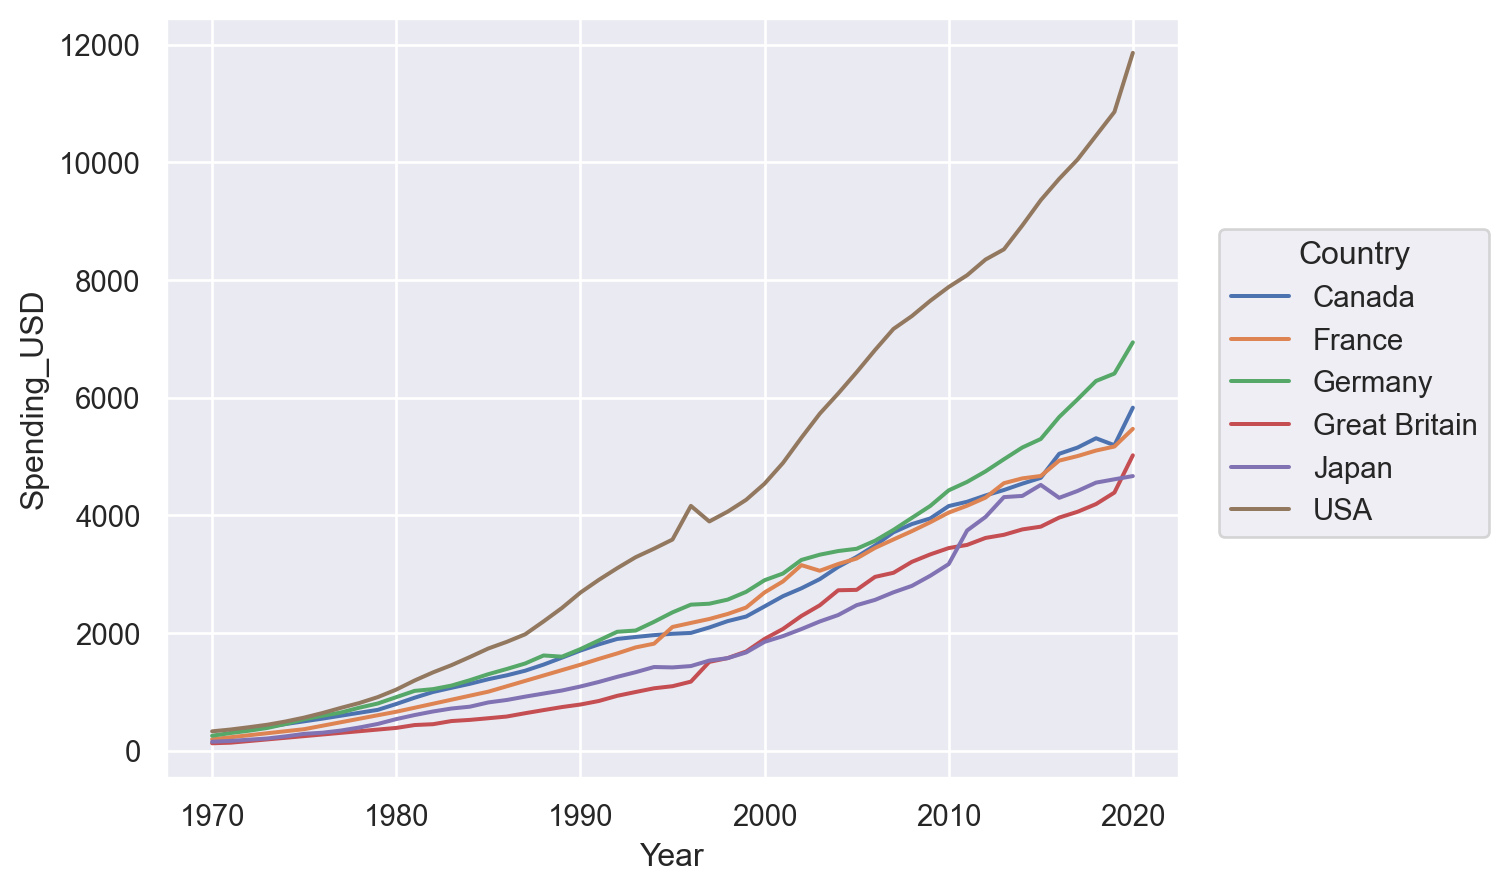

In [38]:
p.add(so.Line())

Or perhaps a stacked area plot:

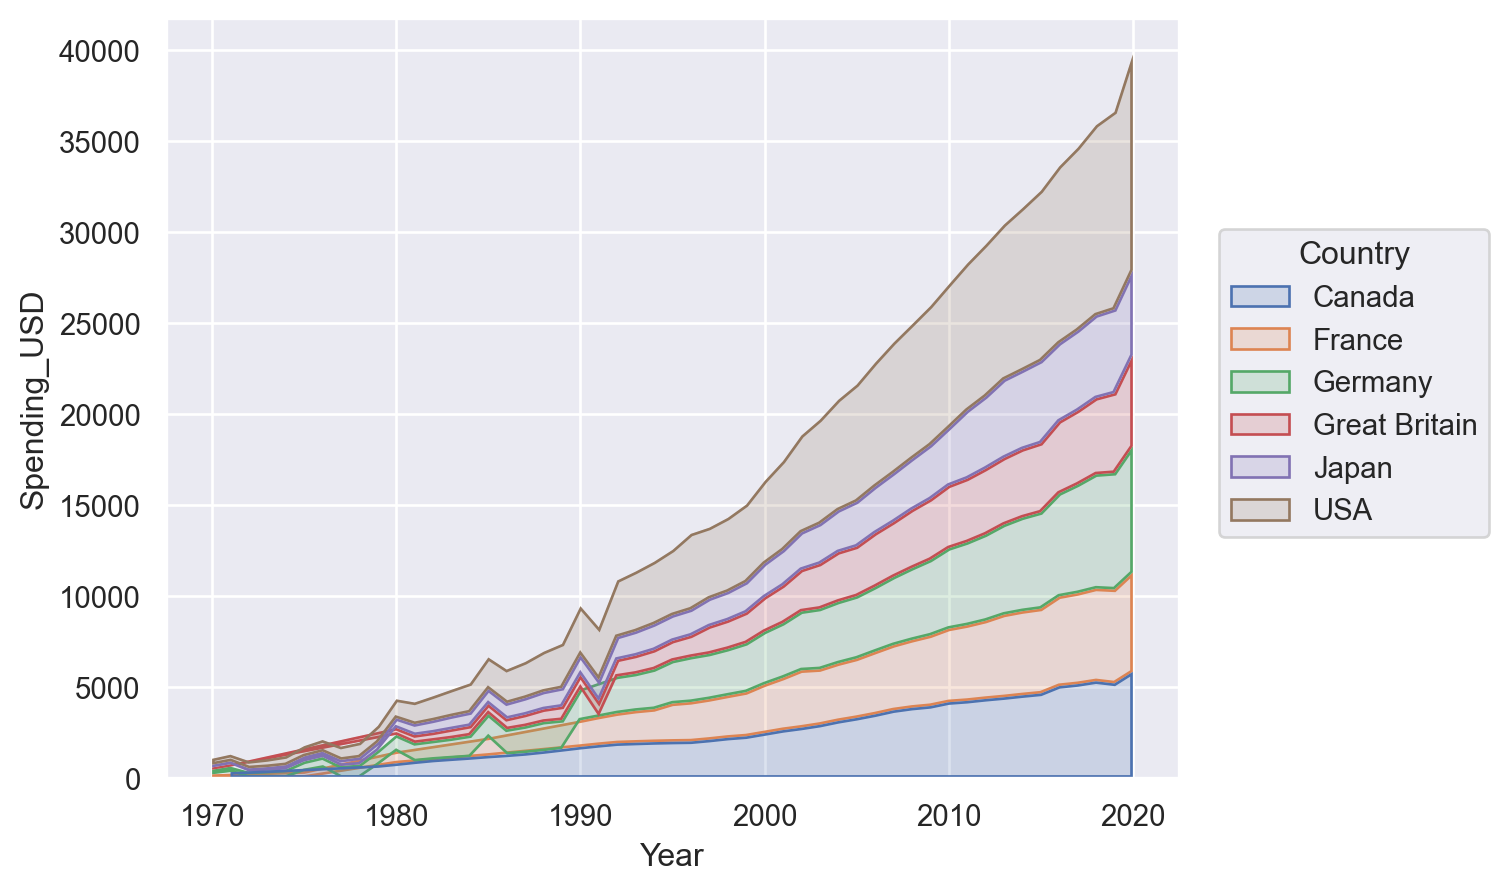

In [39]:
p.add(so.Area(), so.Stack())

The `Plot` methods are fully declarative. Calling them updates the plot spec, but it doesn't actually do any plotting. One consequence of this is that methods can be called in any order, and many of them can be called multiple times.

When does the plot actually get rendered? `Plot` is optimized for use in notebook environments. The rendering is automatically triggered when the `Plot` gets displayed in the Jupyter REPL. That's why we didn't see anything in the example above, where we defined a `Plot` but assigned it to `p` rather than letting it return out to the REPL.

To see a plot in a notebook, either return it from the final line of a cell or call Jupyter's built-in `display` function on the object. The notebook integration bypasses :mod:`matplotlib.pyplot` entirely, but you can use its figure-display machinery in other contexts by calling `Plot.show`.

You can also save the plot to a file (or buffer) by calling `Plot.save`.

## Customising the appearance

The new interface aims to support a deep amount of customisation through `Plot`, reducing the need to switch gears and use matplotlib functionality directly. (But please be patient; not all of the features needed to achieve this goal have been implemented!)

### Parameterising scales

All of the data-dependent properties are controlled by the concept of a `Scale` and the `Plot.scale` method. This method accepts several different types of arguments. One possibility, which is closest to the use of scales in matplotlib, is to pass the name of a function that transforms the coordinates:

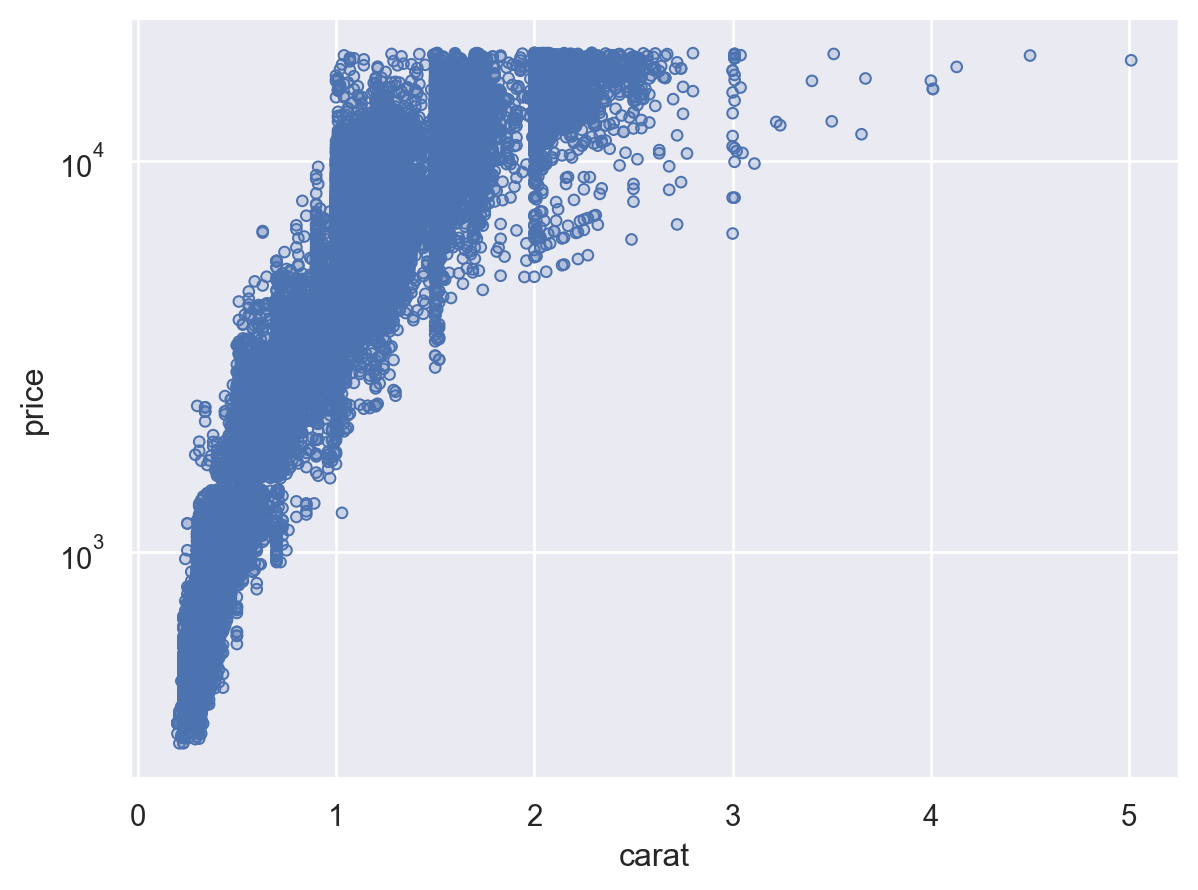

In [40]:
(
    so.Plot(diamonds, x="carat", y="price")
    .add(so.Dots())
    .scale(y="log")
)

`Plot.scale` can also control the mappings for semantic properties like `color`. You can directly pass it any argument that you would pass to the `palette` parameter in seaborn's function interface:

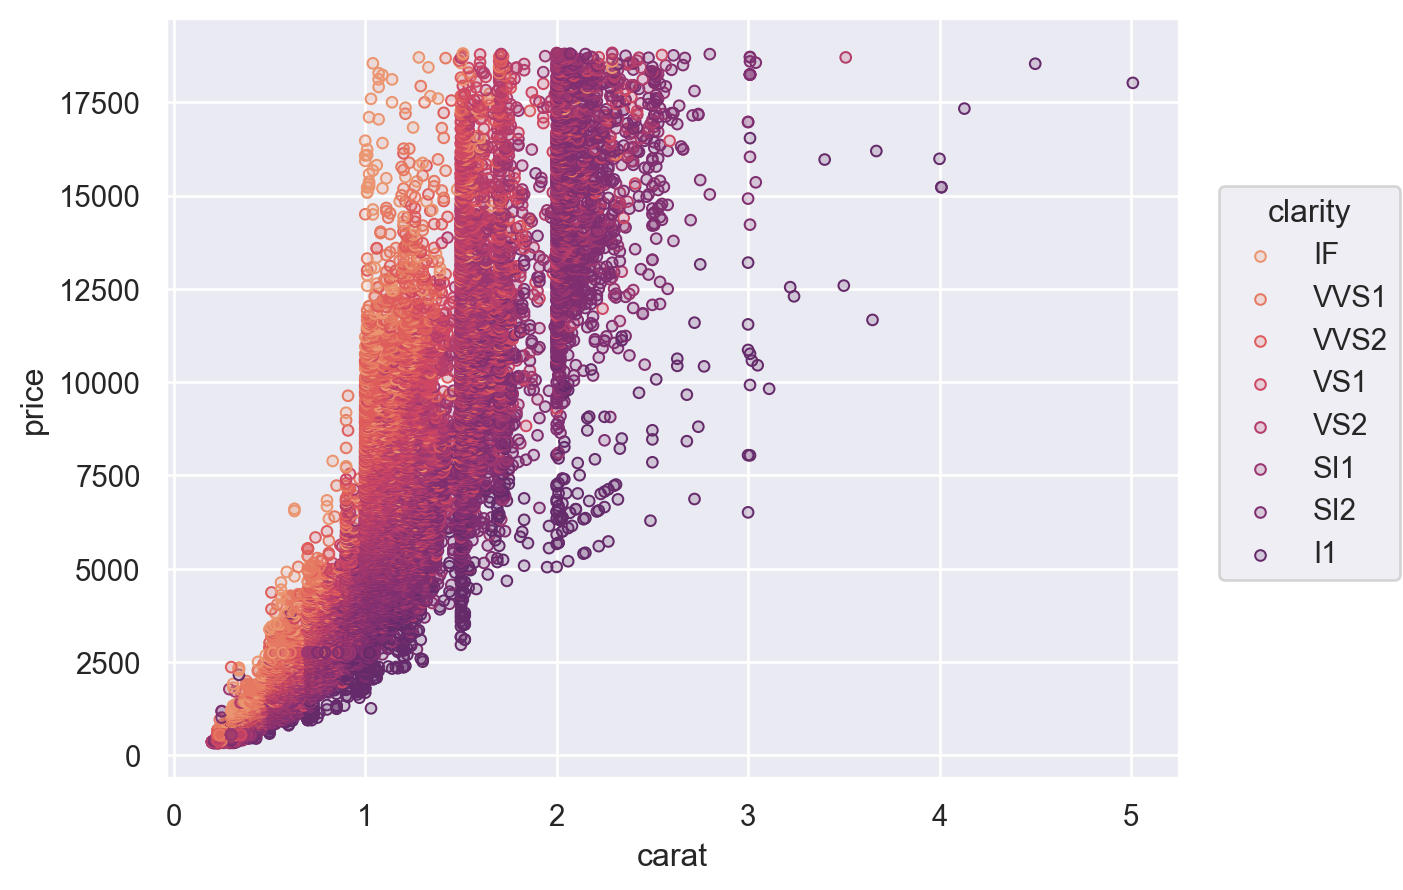

In [41]:
(
    so.Plot(diamonds, x="carat", y="price", color="clarity")
    .add(so.Dots())
    .scale(color="flare")
)

Another option is to provide a tuple of `(min, max)` values, controlling the range that the scale should map into. This works both for numeric properties and for colors:

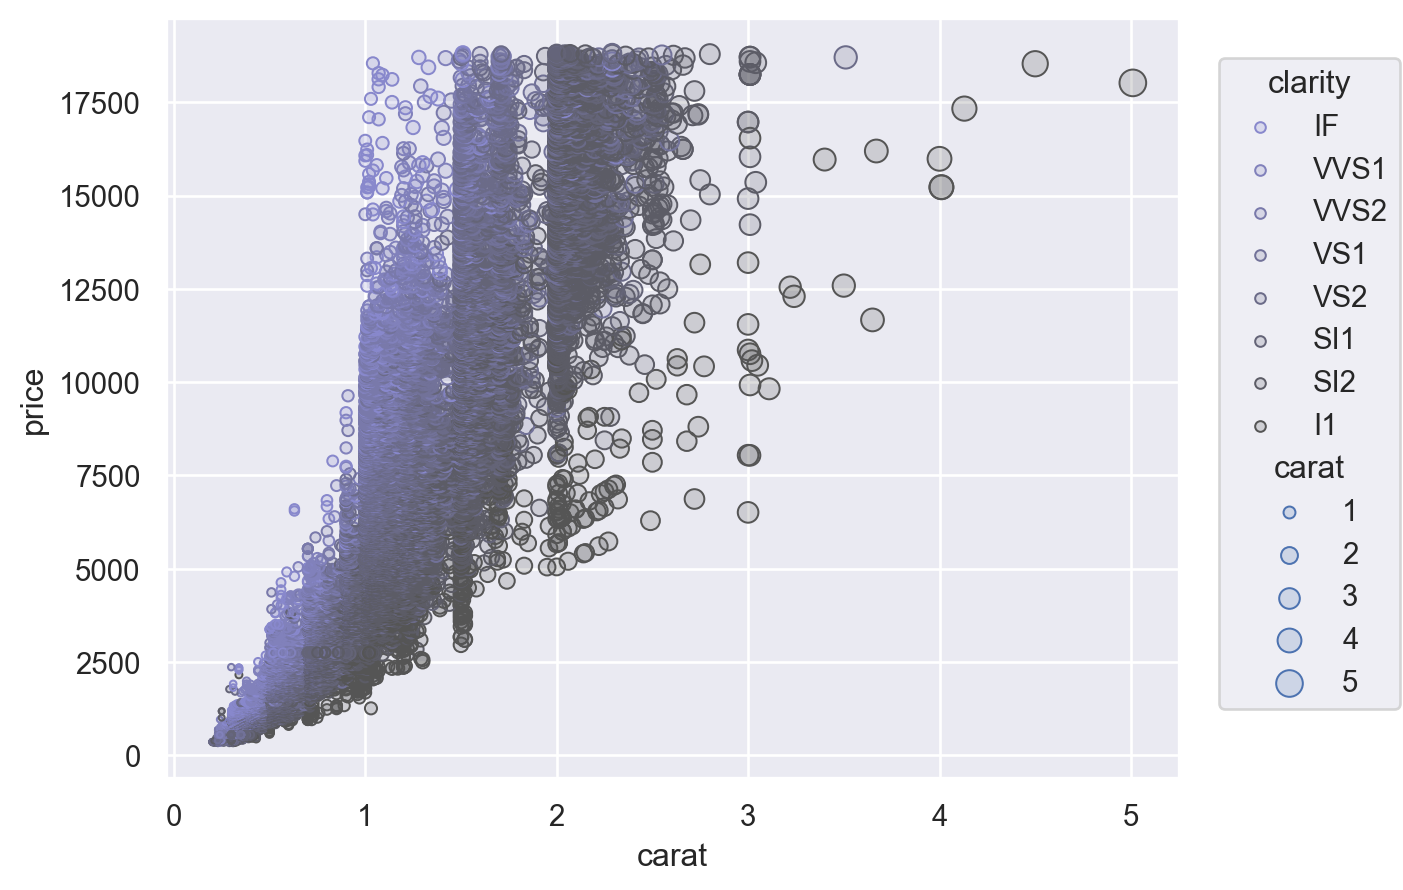

In [42]:
(
    so.Plot(diamonds, x="carat", y="price", color="clarity", pointsize="carat")
    .add(so.Dots())
    .scale(color=("#88c", "#555"), pointsize=(2, 10))
)

For additional control, you can pass a `Scale` object. There are several different types of `Scale`, each with appropriate parameters. For example, `Continuous` lets you define the input domain (`norm`), the output range (`values`), and the function that maps between them (`trans`), while `Nominal` allows you to specify an ordering:

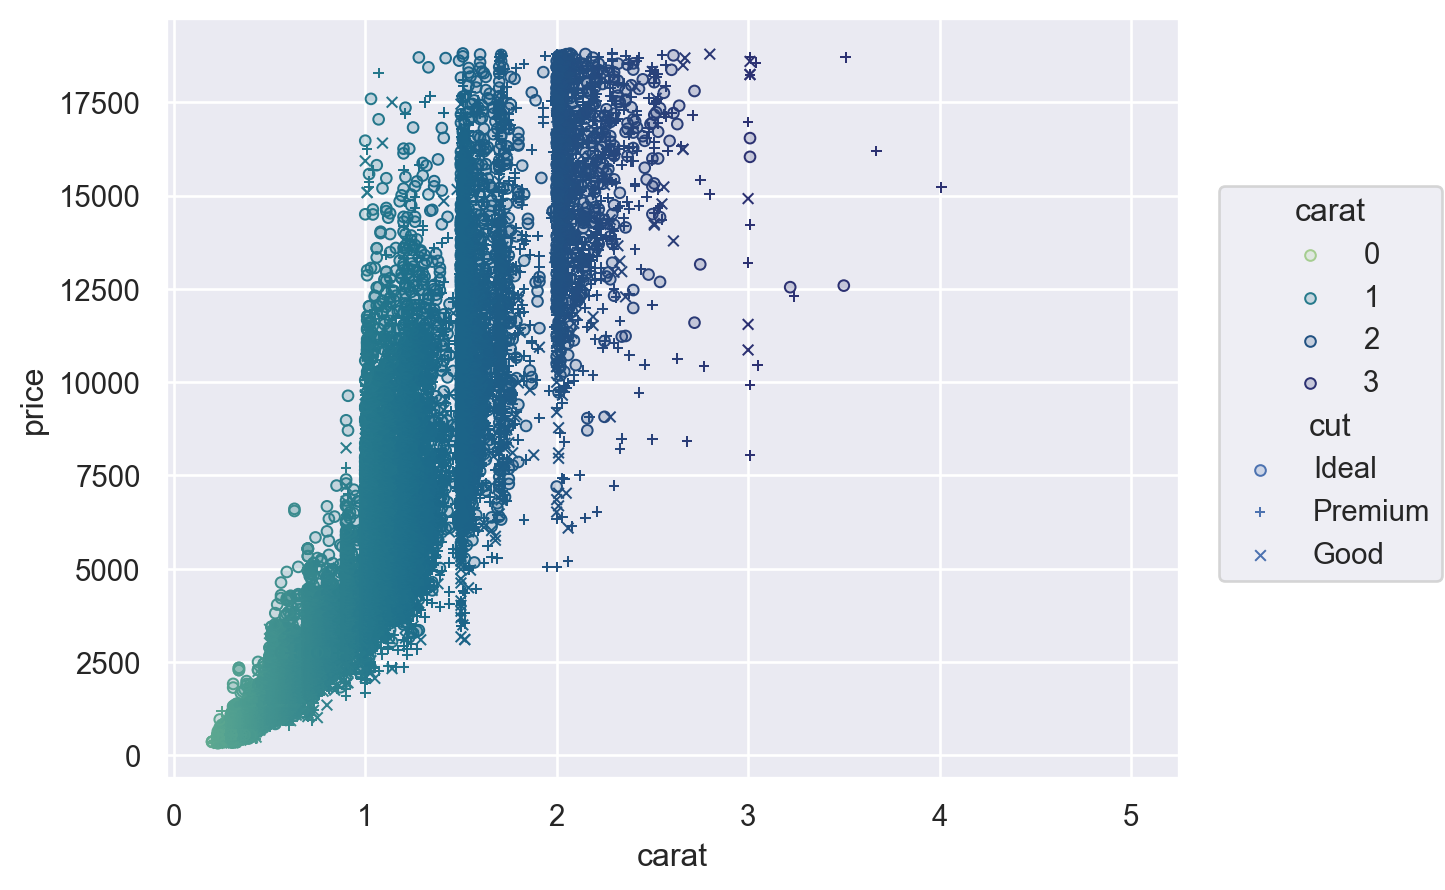

In [43]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat", marker="cut")
    .add(so.Dots())
    .scale(
        color=so.Continuous("crest", norm=(0, 3), trans="sqrt"),
        marker=so.Nominal(["o", "+", "x"], order=["Ideal", "Premium", "Good"]),
    )
)

### Customising legends and ticks

The `Scale` objects are also how you specify which values should appear as tick labels / in the legend, along with how they appear. For example, the `Continuous.tick` method lets you control the density or locations of the ticks, and the `Continuous.label` method lets you modify the format:

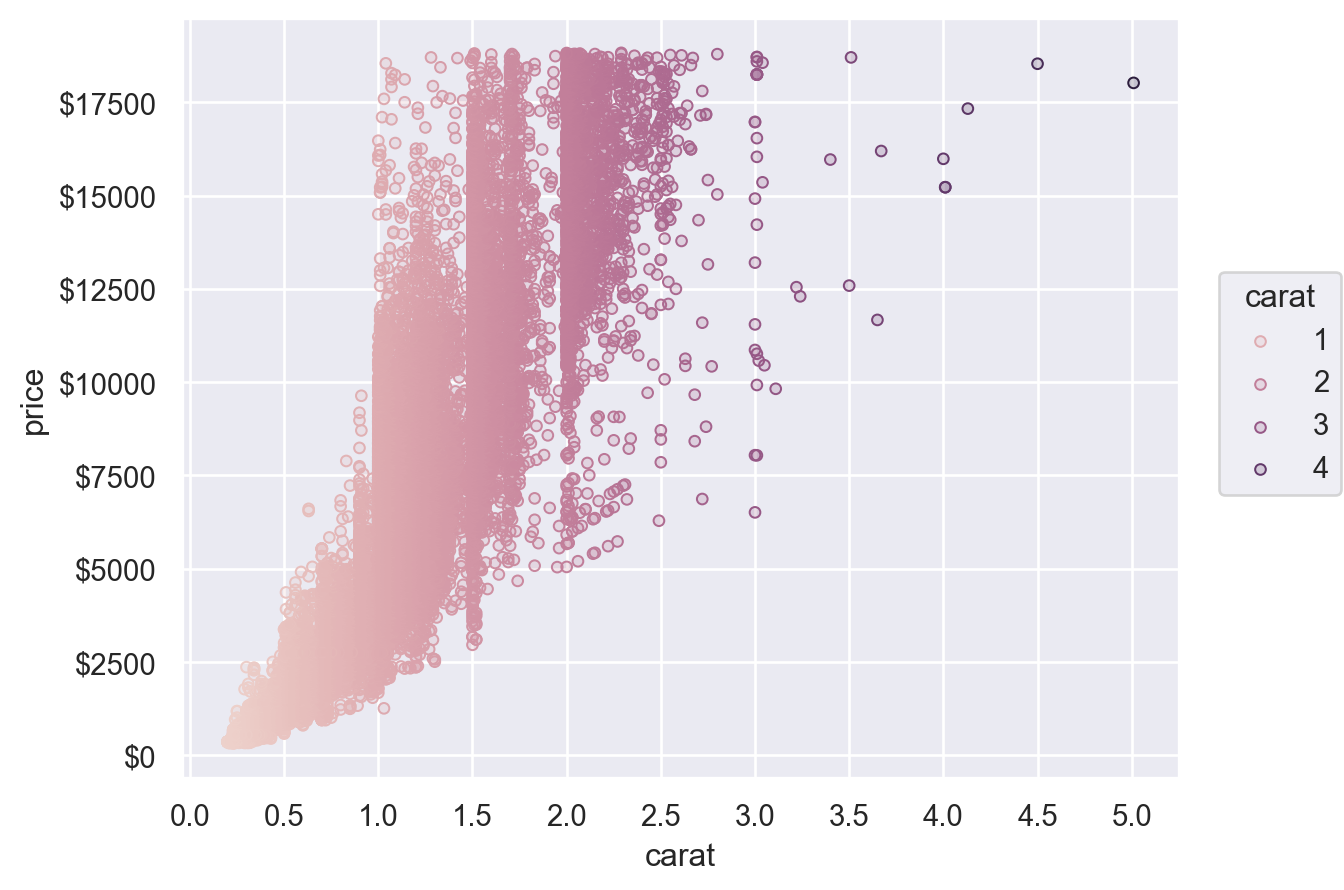

In [44]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat")
    .add(so.Dots())
    .scale(
        x=so.Continuous().tick(every=0.5),
        y=so.Continuous().label(like="${x:.0f}"),
        color=so.Continuous().tick(at=[1, 2, 3, 4]),
    )
)

### Customising limits, labels, and titles

`Plot` has a number of methods for simple customisation, including `Plot.label`, `Plot.limit`, and `Plot.share`:

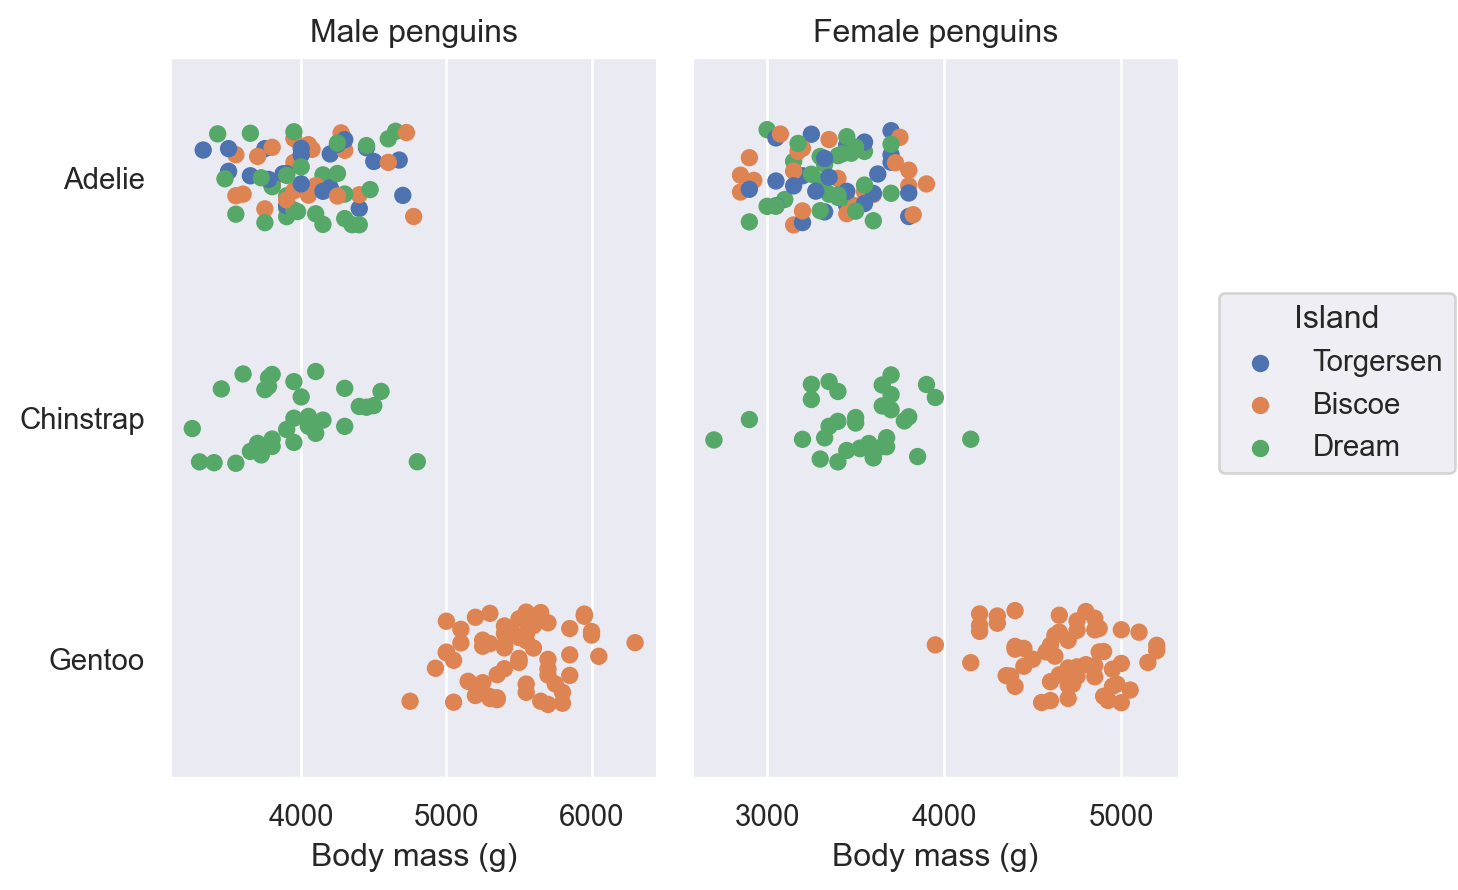

In [45]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5))
    .share(x=False)
    .limit(y=(2.5, -.5))
    .label(
        x="Body mass (g)", y="",
        color=str.capitalize,
        title="{} penguins".format,
    )
)

### Theme customisation

Finally, `Plot` supports data-independent theming through the `Plot.theme` method. Currently, this method accepts a dictionary of matplotlib rc parameters. You can set them directly and/or pass a package of parameters from seaborn's theming functions:

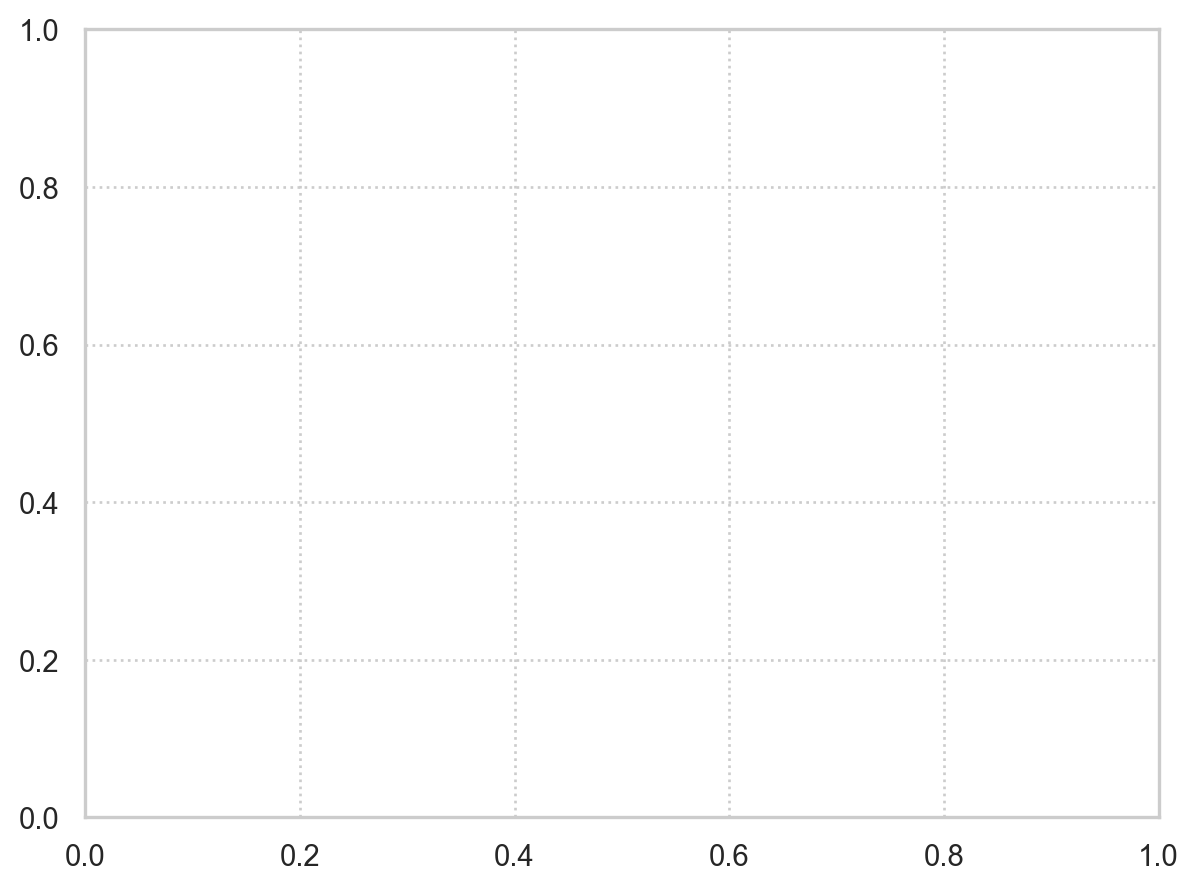

In [46]:
from seaborn import axes_style
so.Plot().theme({**axes_style("whitegrid"), "grid.linestyle": ":"})